# Project Team ID :- PTID-CDS-JUL-23-1595

# Project ID :- PRCP-1017-AutoPricePred

# Team Members :-
- Ganesh Kotagundla (kotagundlaganesh@gmail.com)

# Problem Statement :-

- Task 1:-Prepare a complete data analysis report on the given data.

* Task 2:-Create a predictive model by applying some data science techniques for theprice of cars with the available independent variables. That should help themanagement to understand how exactly the prices vary with the independent variables.They can accordingly manipulate the design of the cars, the business strategy etc. tomeet certain price levels

# Import Basic Libraries

In [409]:
# import basic libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

# Loading Data Set

In [410]:
# loading dataset
data1=pd.read_csv('auto_imports.csv')

In [411]:
data1

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [412]:
# information about given dataset (they have no feature name)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   3            200 non-null    int64  
 1   ?            200 non-null    object 
 2   alfa-romero  200 non-null    object 
 3   gas          200 non-null    object 
 4   std          200 non-null    object 
 5   two          200 non-null    object 
 6   convertible  200 non-null    object 
 7   rwd          200 non-null    object 
 8   front        200 non-null    object 
 9   88.60        200 non-null    float64
 10  168.80       200 non-null    float64
 11  64.10        200 non-null    float64
 12  48.80        200 non-null    float64
 13  2548         200 non-null    int64  
 14  dohc         200 non-null    object 
 15  four         200 non-null    object 
 16  130          200 non-null    int64  
 17  mpfi         200 non-null    object 
 18  3.47         200 non-null    object 
 19  2.68    

In [413]:
# define feayture names
data_columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [414]:
# impute feature name
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
imputer.fit(data1)
imputed_data=imputer.transform(data1)
data=pd.DataFrame(imputed_data,columns=data_columns)

In [415]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [416]:
# information about given dataset (after impute feature name) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          200 non-null    object
 1   normalized-losses  200 non-null    object
 2   make               200 non-null    object
 3   fuel-type          200 non-null    object
 4   aspiration         200 non-null    object
 5   num-of-doors       200 non-null    object
 6   body-style         200 non-null    object
 7   drive-wheels       200 non-null    object
 8   engine-location    200 non-null    object
 9   wheel-base         200 non-null    object
 10  length             200 non-null    object
 11  width              200 non-null    object
 12  height             200 non-null    object
 13  curb-weight        200 non-null    object
 14  engine-type        200 non-null    object
 15  num-of-cylinders   200 non-null    object
 16  engine-size        200 non-null    object
 1

In [417]:
new_record={'symboling':3,'normalized-losses':'?','make':'alfa-romero','fuel-type':'gas','aspiration':'std','num-of-doors':'two','body-style':'convertible','drive-wheels':'rwd','engine-location':'front','wheel-base':88.60,'length':168.80,'width':64.10,'height':48.80,'curb-weight':	2548,'engine-type':'dohc','num-of-cylinders':'four','engine-size':130,'fuel-system':'mpfi','bore':'3.47','stroke':'2.68','compression-ratio':9.00,'horsepower':'111','peak-rpm':'5000', 'city-mpg':21, 'highway-mpg':27, 'price':13495}

In [418]:
new_row=pd.DataFrame(new_record, index=[0])

In [419]:
data=pd.concat([new_row, data], ignore_index=True)

In [420]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# Basic Checks

In [421]:
# Checking for first five row (using set option on columns)
data.head(pd.set_option('display.max_columns',None))

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [422]:
# last five row
data.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          201 non-null    object
 1   normalized-losses  201 non-null    object
 2   make               201 non-null    object
 3   fuel-type          201 non-null    object
 4   aspiration         201 non-null    object
 5   num-of-doors       201 non-null    object
 6   body-style         201 non-null    object
 7   drive-wheels       201 non-null    object
 8   engine-location    201 non-null    object
 9   wheel-base         201 non-null    object
 10  length             201 non-null    object
 11  width              201 non-null    object
 12  height             201 non-null    object
 13  curb-weight        201 non-null    object
 14  engine-type        201 non-null    object
 15  num-of-cylinders   201 non-null    object
 16  engine-size        201 non-null    object
 1

In [424]:
# checking feature names
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [425]:
# checking missing values
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [426]:
# shape of given dataset
data.shape

(201, 26)

In [427]:
# size of given dataset
data.size

5226

In [428]:
# checking describe
data.describe().T

,count,unique,top,freq
symboling,201,6,0,65
normalized-losses,201,52,?,37
make,201,22,toyota,32
fuel-type,201,2,gas,181
aspiration,201,2,std,165
num-of-doors,201,3,four,113
body-style,201,5,sedan,94
drive-wheels,201,3,fwd,118
engine-location,201,2,front,198
wheel-base,201.0,52.0,93.7,20.0


# Task 1 :- Prepare a complete data analysis report on the given data.

# EDA

In [429]:
# sweetviz report
import sweetviz as sv
report=sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


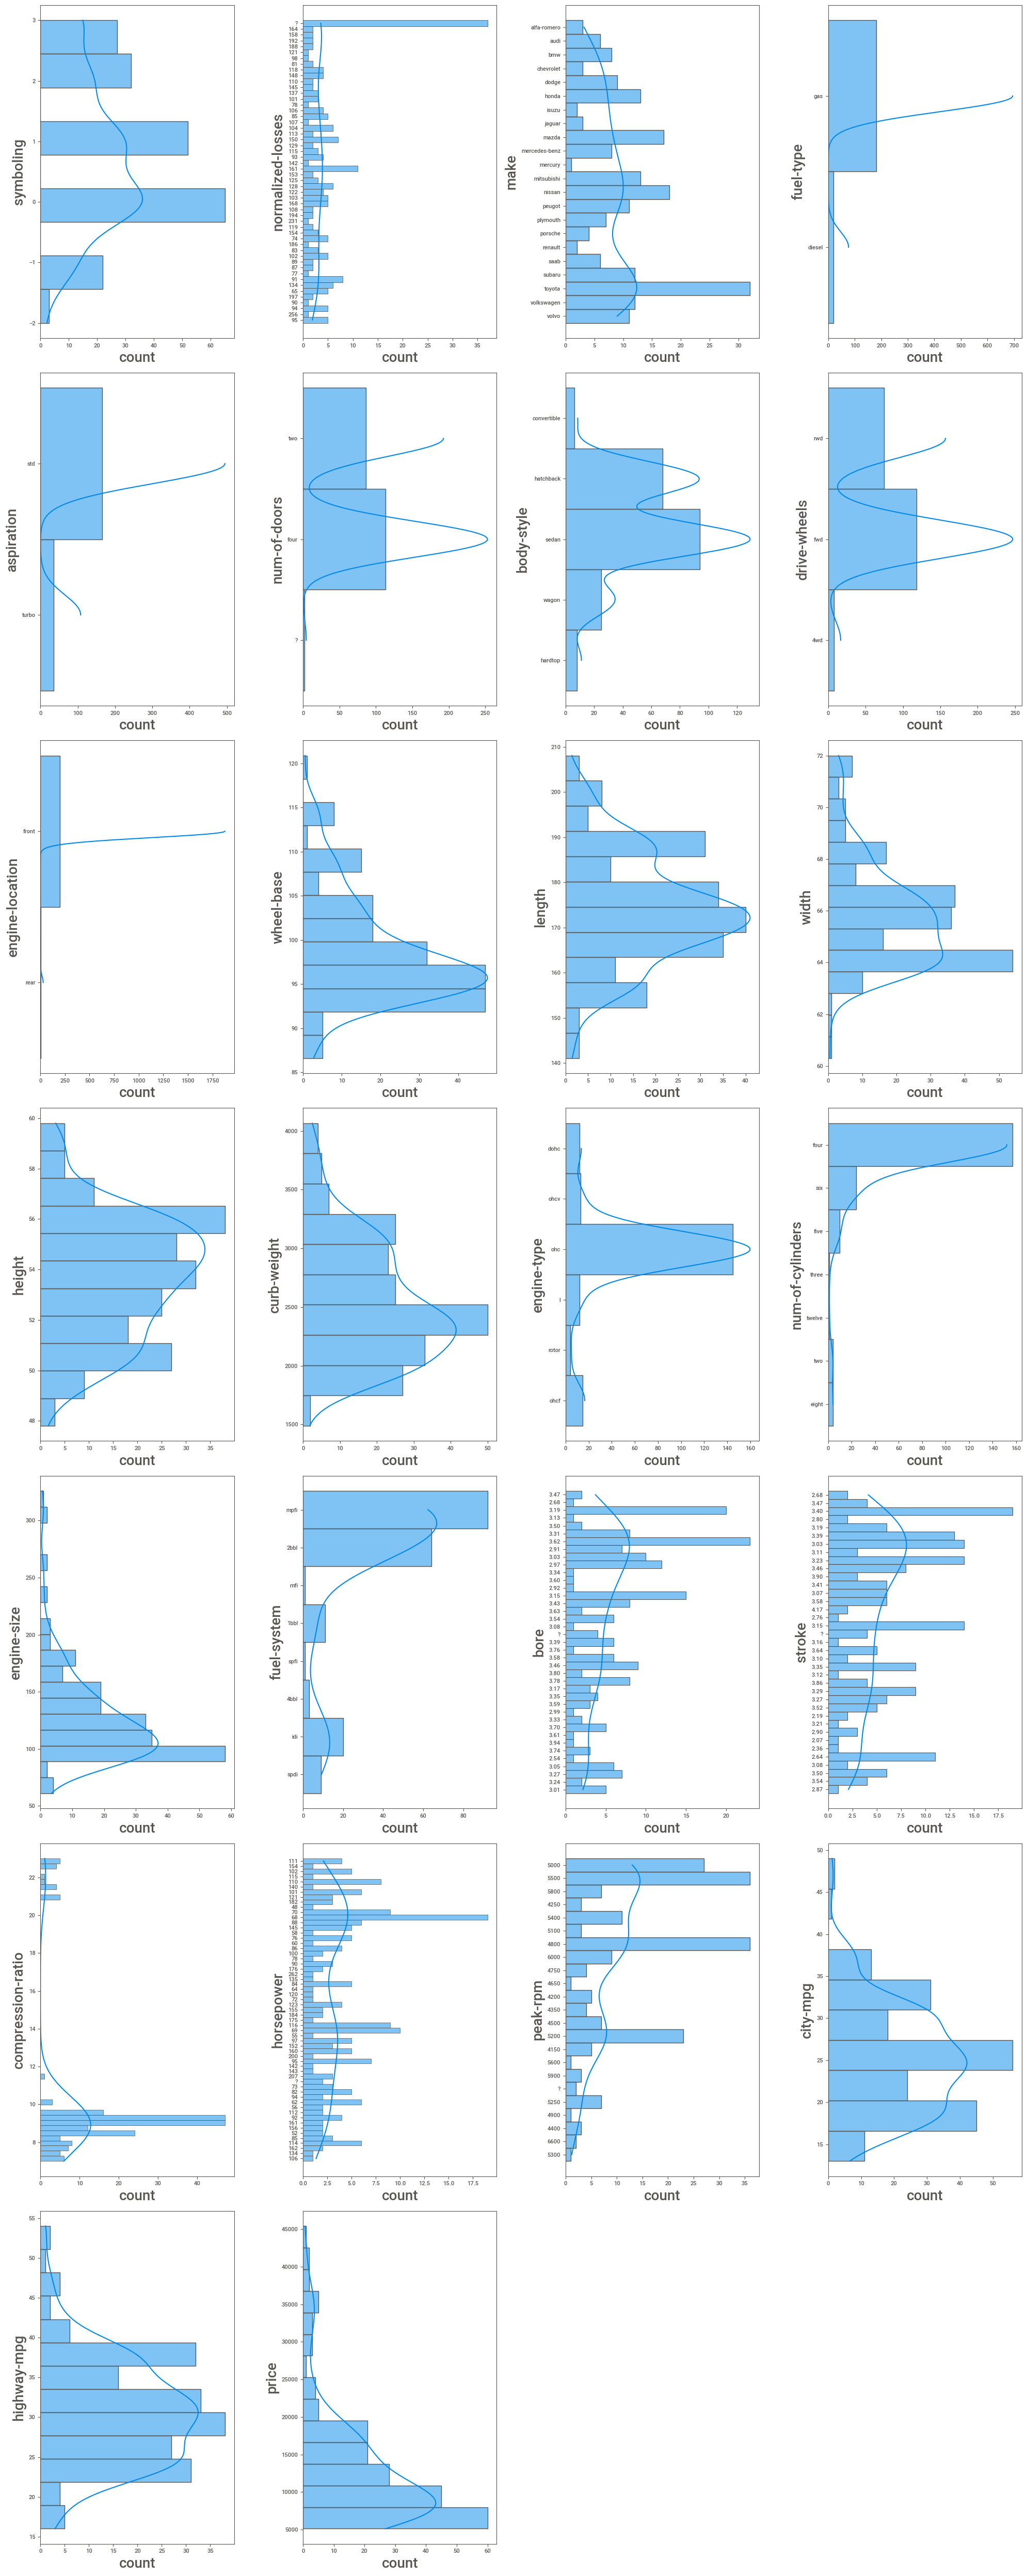

In [430]:
# Checking Distribution of The Given Dataset Using For Loop Condition
plt.figure(figsize=(20,50))
plotnumber=1

for i in data:
    if plotnumber<=28:
        plot=plt.subplot(7,4,plotnumber)
        sns.histplot(y=data[i],kde=True)
        plt.xlabel('count',fontsize=20)
        plt.ylabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

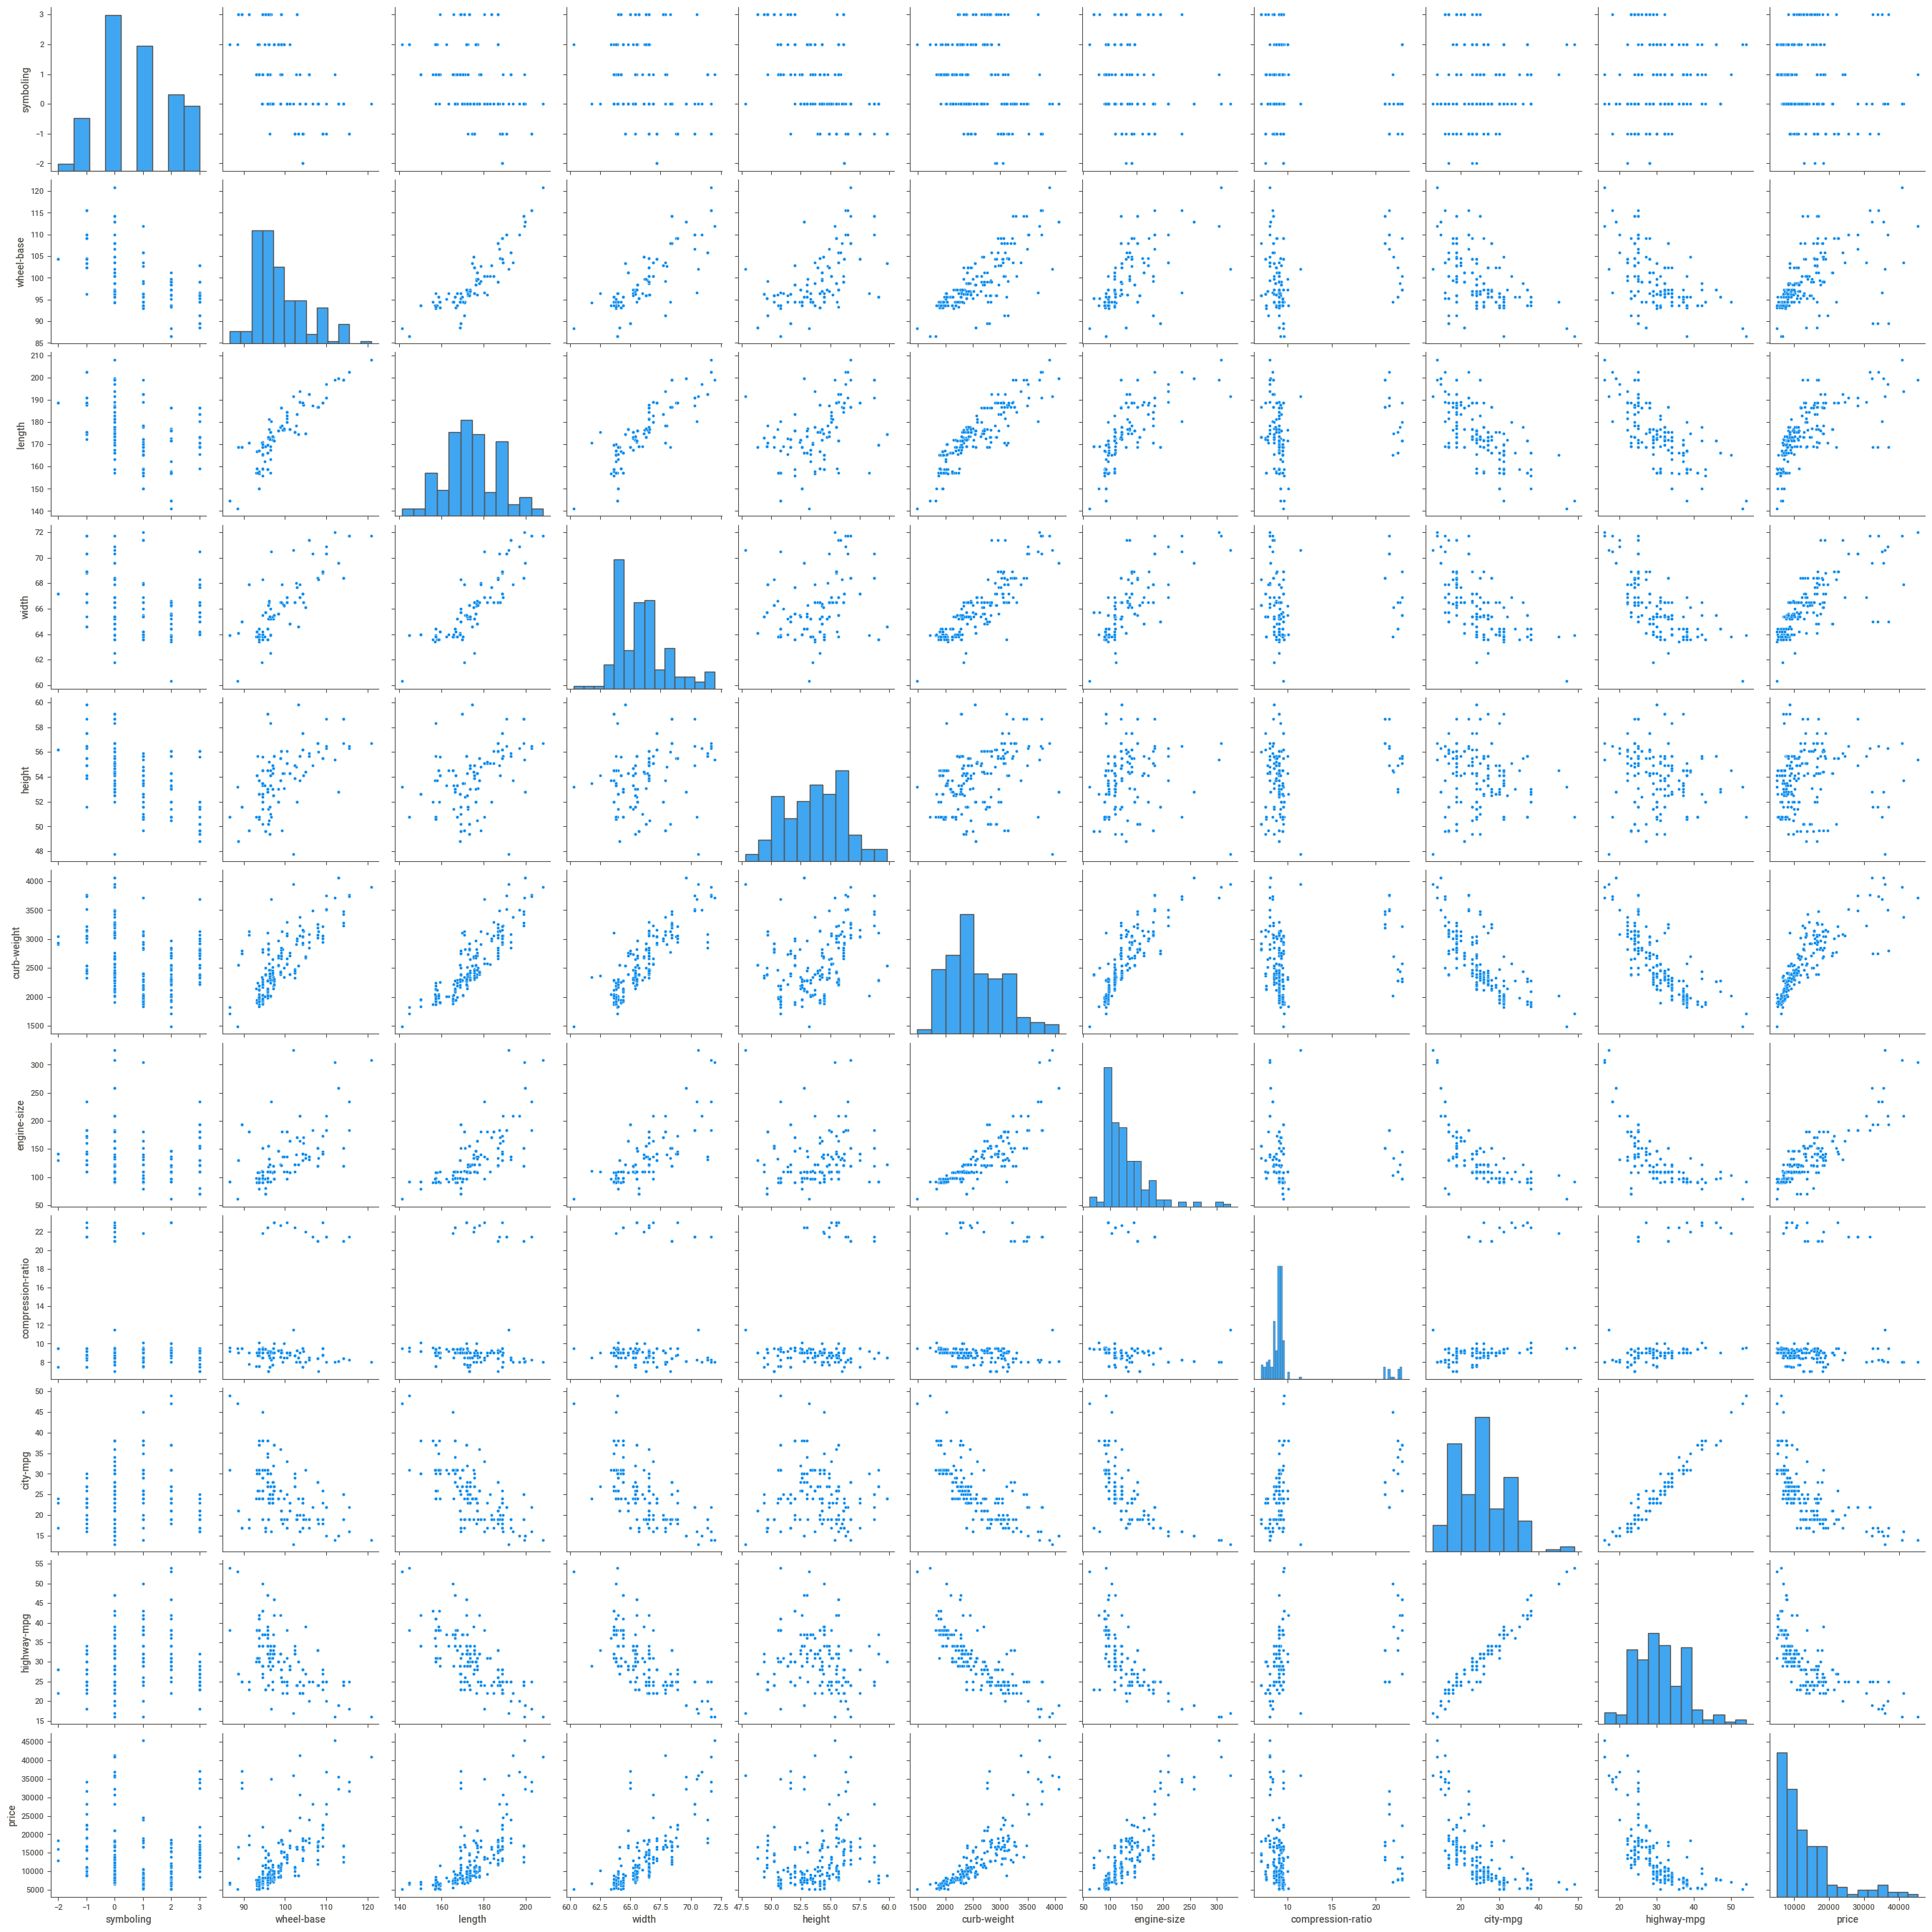

In [431]:
# pair plor
sns.pairplot(data)

# DATA PREPROSESING

## HANDLING DUPLICATED VALUES

In [432]:
# Checking Duplicated values
data.duplicated().sum()

0

- THEY HAVE NO DUPLICATED VALUES

## HANDLING MISSING VALUES

In [433]:
# Checking missing values
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

- THEY HAVE NO MISSING VALUES

In [434]:
# value counts on 'peak-rpm'
data['peak-rpm'].value_counts()

5500    36
4800    36
5000    27
5200    23
5400    11
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
5100     3
5900     3
4250     3
4400     3
?        2
6600     2
4650     1
5600     1
4900     1
5300     1
Name: peak-rpm, dtype: int64

In [435]:
# finding '?' by using loc
data.loc[data['peak-rpm']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
127,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


In [436]:
# replacing '?' by using mode (object data type)
data.loc[data['peak-rpm']=='?','peak-rpm']='4800'

In [437]:
data['peak-rpm'].unique()

array(['5000', '5500', '5800', '4250', '5400', '5100', '4800', '6000',
       '4750', '4650', '4200', '4350', '4500', '5200', '4150', '5600',
       '5900', '5250', '4900', '4400', '6600', '5300'], dtype=object)

In [438]:
data['normalized-losses'].value_counts()

?      37
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: normalized-losses, dtype: int64

In [439]:
data['normalized-losses'].min()

'101'

In [440]:
# finding '?' then replace by using min
data.loc[data['normalized-losses']=='?','normalized-losses']=data['normalized-losses'].min()

In [441]:
data['num-of-doors'].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [442]:
data['num-of-doors'].mode()

0    four
Name: num-of-doors, dtype: object

In [443]:
# finding '?' by using loc
data.loc[data['num-of-doors']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
60,0,101,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [444]:
# replacring '?' by using mode 
data.loc[data['num-of-doors']=='?','num-of-doors']='four'

In [445]:
data.loc[[26,60]]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
26,1,148,dodge,gas,turbo,four,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
60,0,101,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [446]:
data['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', '?', '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [447]:
data.bore.mode()

0    3.62
Name: bore, dtype: object

In [448]:
# finding '?' by using loc
data.loc[data['bore']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,10945
53,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
54,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,13645
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,?,?,9.4,135,6000,16,23,15645


In [449]:
# replacing '?' by using mode
data.loc[data['bore']=='?','bore']='3.62'

In [450]:
data.loc[data['bore']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [451]:
data.stroke.unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [452]:
data.stroke.mode()

0    3.40
Name: stroke, dtype: object

In [453]:
# finding '?' by use loc
data.loc[data['stroke']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
52,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.62,?,9.4,101,6000,17,23,10945
53,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,3.62,?,9.4,101,6000,17,23,11845
54,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,two,70,4bbl,3.62,?,9.4,101,6000,17,23,13645
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,two,80,mpfi,3.62,?,9.4,135,6000,16,23,15645


In [454]:
# replacing '?' by using mode
data.loc[data['stroke']=='?','stroke']='3.40'

In [455]:
data.loc[data['stroke']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [456]:
data.stroke.unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86', '3.29',
       '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36', '2.64',
       '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [457]:
data['price'].unique()

array([13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430,
       16925, 20970, 21105, 24565, 30760, 41315, 36880, 5151, 6295, 6575,
       5572, 6377, 7957, 6229, 6692, 7609, 8558, 8921, 12964, 6479, 6855,
       5399, 6529, 7129, 7295, 7895, 9095, 8845, 10295, 12945, 10345,
       6785, 11048, 32250, 35550, 36000, 5195, 6095, 6795, 6695, 7395,
       10945, 11845, 13645, 15645, 8495, 10595, 10245, 10795, 11245,
       18280, 18344, 25552, 28248, 28176, 31600, 34184, 35056, 40960,
       45400, 16503, 5389, 6189, 6669, 7689, 9959, 8499, 12629, 14869,
       14489, 6989, 8189, 9279, 5499, 7099, 6649, 6849, 7349, 7299, 7799,
       7499, 7999, 8249, 8949, 9549, 13499, 14399, 17199, 19699, 18399,
       11900, 13200, 12440, 13860, 15580, 16900, 16695, 17075, 16630,
       17950, 18150, 12764, 22018, 32528, 34028, 37028, 9295, 9895, 11850,
       12170, 15040, 15510, 18620, 5118, 7053, 7603, 7126, 7775, 9960,
       9233, 11259, 7463, 10198, 8013, 11694, 5348, 6338, 6488, 6918,

In [458]:
# finding '?' by using loc
data.loc[data['horsepower']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,0,101,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,?,4800,23,31,9295
127,2,101,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,?,4800,23,31,9895


In [459]:
data.horsepower.mode()

0    68
Name: horsepower, dtype: object

In [460]:
# replacing '?' by using mode
data.loc[data['horsepower']=='?','horsepower']='68'

In [461]:
data.loc[data['horsepower']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [462]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,101,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,101,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,101,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## CHANGING DATATYPES

In [463]:
# to convert 'object' data type into 'int64' & 'float64'
data['symboling']=data['symboling'].astype('int64')
data['normalized-losses']=data['normalized-losses'].astype('int64')
data['wheel-base']=data['wheel-base'].astype('int64')
data['length']=data['length'].astype('int64')
data['width']=data['width'].astype('int64')
data['height']=data['height'].astype('int64')
data['curb-weight']=data['curb-weight'].astype('int64')
data['engine-size']=data['engine-size'].astype('int64')
data['compression-ratio']=data['compression-ratio'].astype('int64')
data['horsepower']=data['horsepower'].astype('int64')
data['peak-rpm']=data['peak-rpm'].astype('int64')
data['city-mpg']=data['city-mpg'].astype('int64')
data['highway-mpg']=data['highway-mpg'].astype('int64')
data['bore']=data['bore'].astype('float64')
data['stroke']=data['stroke'].astype('float64')
data['price']=data['price'].astype('int64')

In [464]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    int64  
 10  length             201 non-null    int64  
 11  width              201 non-null    int64  
 12  height             201 non-null    int64  
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

## ENCODER

In [465]:
data.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [466]:
data.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [467]:
#converting categorical column (make) into numerical using map function (Mannual encoding)
data['make']=data['make'].map({'toyota':0, 'nissan':1, 'mazda':2, 'mitsubishi':3, 'honda':4, 'volkswagen':5, 'subaru':6,
                               'peugot':7, 'volvo':8, 'dodge':9, 'mercedes-benz':10, 'bmw':11,'plymouth':12, 'audi':13,
                               'saab':14, 'porsche':15, 'jaguar':16,'chevrolet':17, 'alfa-romero':18, 'isuzu':19, 'renault':20,
                               'mercury':21})

In [468]:
data['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [469]:
data['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

In [470]:
#converting categorical column (fule-type) into numerical using map function (Mannual encoding)
data['fuel-type']=data['fuel-type'].map({'gas':0, 'diesel':1})

In [471]:
data['fuel-type'].value_counts()

0    181
1     20
Name: fuel-type, dtype: int64

In [472]:
data.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [473]:
data['aspiration'].value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [474]:
#converting categorical column (aspiration) into numerical using map function (Mannual encoding)
data['aspiration']=data['aspiration'].map({'std':0, 'turbo':1})

In [475]:
data['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [476]:
data['num-of-doors'].value_counts()

four    115
two      86
Name: num-of-doors, dtype: int64

In [477]:
#converting categorical column (num-of-doors) into numerical using map function (Mannual encoding)
data['num-of-doors']=data['num-of-doors'].map({'four':0, 'two':1})

In [478]:
data['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [479]:
data['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [480]:
#converting categorical column (body-style) into numerical using map function (Mannual encoding)
data['body-style']=data['body-style'].map({'sedan':0, 'hatchback':1,'wagon':2,'hardtop':3,'convertible':4})

In [481]:
data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [482]:
data['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [483]:
#converting categorical column (drive-wheels) into numerical using map function (Mannual encoding)
data['drive-wheels']=data['drive-wheels'].map({'fwd':0, 'rwd':1,'4wd':2})

In [484]:
data['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [485]:
data['engine-location'].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [486]:
#converting categorical column (engine-location) into numerical using map function (Mannual encoding)
data['engine-location']=data['engine-location'].map({'front':0, 'rear':1})

In [487]:
data['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [488]:
data['engine-type'].value_counts()

ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: engine-type, dtype: int64

In [489]:
#converting categorical column (engine-type) into numerical using map function (Mannual encoding)
data['engine-type']=data['engine-type'].map({'ohc':0, 'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5})

In [490]:
data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [491]:
data['num-of-cylinders'].value_counts()

four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [492]:
#converting categorical column (num-of-cylinders) into numerical using map function (Mannual encoding)
data['num-of-cylinders']=data['num-of-cylinders'].map({'four':0, 'six':1,'five':2,'two':3,'eight':4,'three':5,'twelve':6})

In [493]:
data['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [494]:
data['fuel-system'].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64

In [495]:
#converting categorical column (fuel-system) into numerical using map function (Mannual encoding)
data['fuel-system']=data['fuel-system'].map({'mpfi':0, '2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':1})

In [496]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    int64  
 3   fuel-type          201 non-null    int64  
 4   aspiration         201 non-null    int64  
 5   num-of-doors       201 non-null    int64  
 6   body-style         201 non-null    int64  
 7   drive-wheels       201 non-null    int64  
 8   engine-location    201 non-null    int64  
 9   wheel-base         201 non-null    int64  
 10  length             201 non-null    int64  
 11  width              201 non-null    int64  
 12  height             201 non-null    int64  
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    int64  
 15  num-of-cylinders   201 non-null    int64  
 16  engine-size        201 non

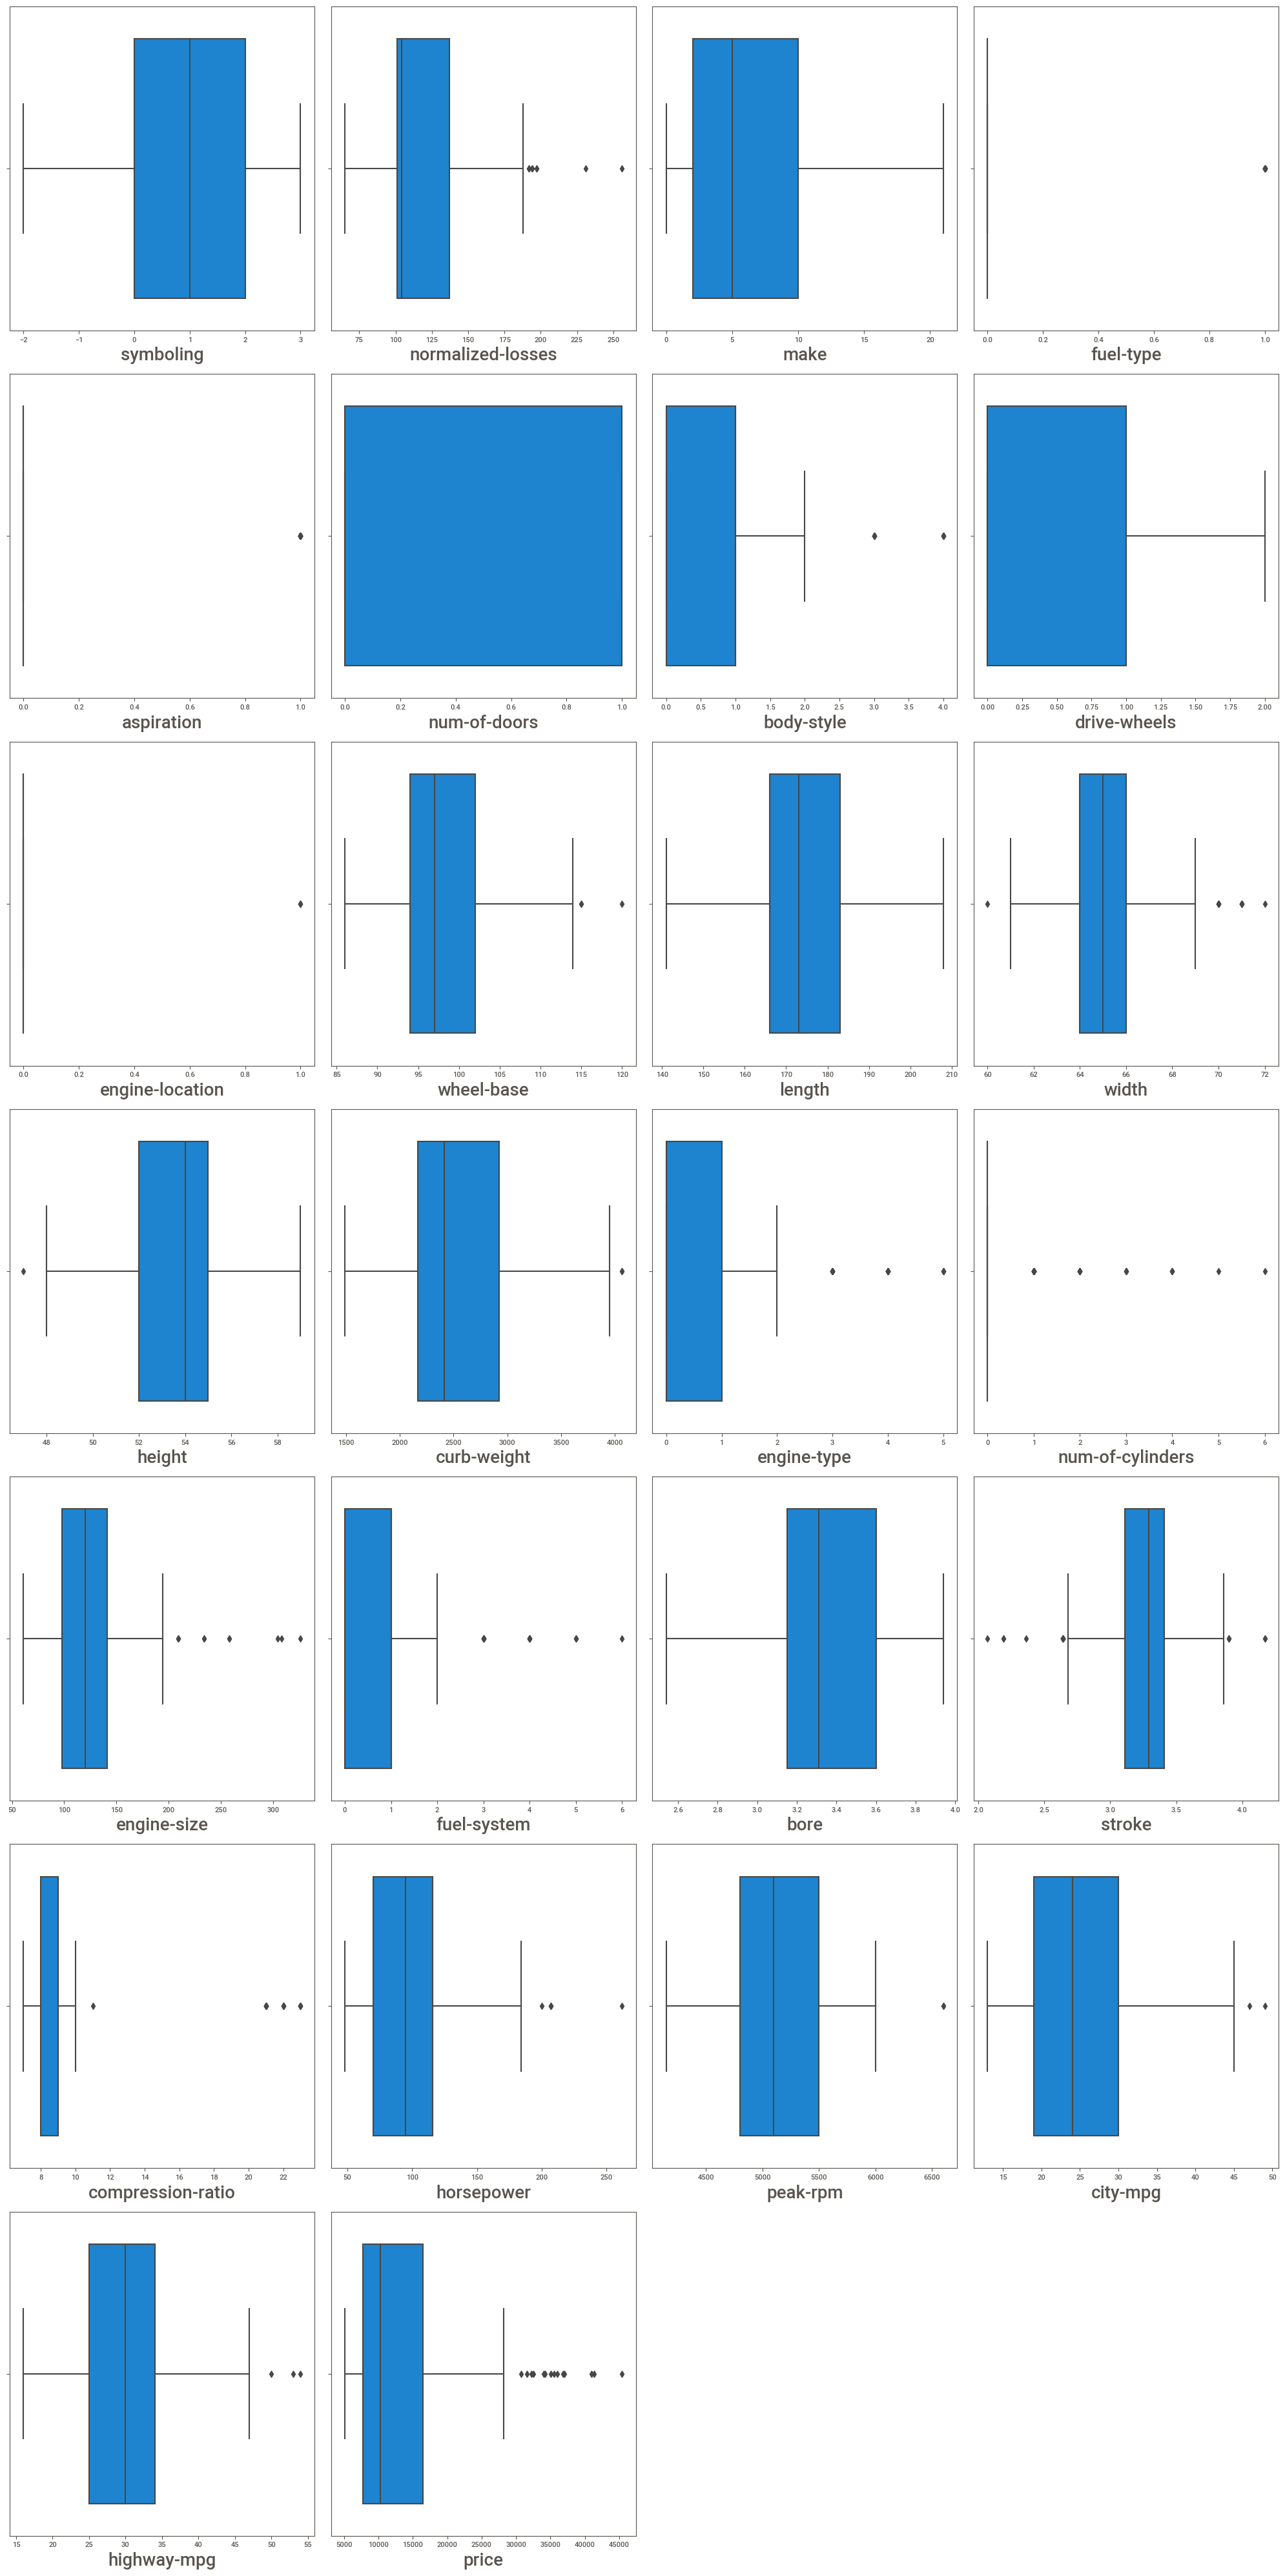

In [497]:
# Checking Outlier in Given Dataset Using Boxplot applying For Loop Condition

plt.figure(figsize=(20,40))
plotnumber=1

for i in data:
    if plotnumber<=28:
        plot=plt.subplot(7,4,plotnumber)
        sns.boxplot(x=data[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [498]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

<AxesSubplot:xlabel='normalized-losses'>

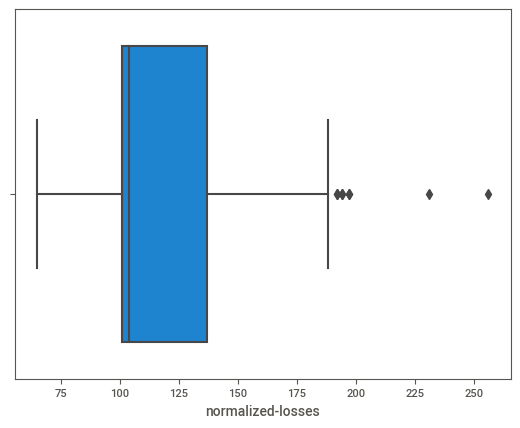

In [499]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['normalized-losses'])

<AxesSubplot:xlabel='normalized-losses', ylabel='Count'>

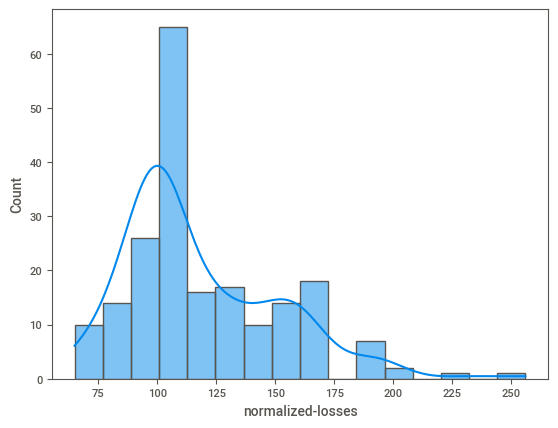

In [500]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['normalized-losses'],kde=True)

In [501]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['normalized-losses'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['normalized-losses'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['normalized-losses'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  36.0
Q1 :  101.0
Q3 :  137.0
Lower_Limit :  47.0
Upper_Limit :  191.0


In [502]:
# outlier present in upper limit
data.loc[(data['normalized-losses']<Lower_Limit) | (data['normalized-losses']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,2,192,11,0,0,1,0,1,0,101,176,64,54,2395,0,0,108,0,3.50,2.80,8,101,5800,23,29,16430
10,0,192,11,0,0,0,0,1,0,101,176,64,54,2395,0,0,108,0,3.50,2.80,8,101,5800,23,29,16925
101,3,194,1,0,0,1,1,1,0,91,170,67,49,3071,2,1,181,0,3.43,3.27,9,160,5200,19,25,17199
102,3,194,1,0,1,1,1,1,0,91,170,67,49,3139,2,1,181,0,3.43,3.27,7,200,5200,17,23,19699
103,1,231,1,0,0,1,1,1,0,99,178,67,49,3139,2,1,181,0,3.43,3.27,9,160,5200,19,25,18399
174,3,197,0,0,0,1,1,1,0,102,183,67,52,2976,3,1,171,0,3.27,3.35,9,161,5200,20,24,16558
175,3,197,0,0,0,1,1,1,0,102,183,67,52,3016,3,1,171,0,3.27,3.35,9,161,5200,19,24,15998
186,3,256,5,0,0,1,1,0,0,94,165,64,51,2221,0,0,109,0,3.19,3.40,8,90,5500,24,29,9980


In [503]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['normalized-losses']>Upper_Limit,['normalized-losses']]=data['normalized-losses'].median()

In [504]:
data.loc[(data['normalized-losses']<Lower_Limit) | (data['normalized-losses']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## aspiration

<AxesSubplot:xlabel='aspiration'>

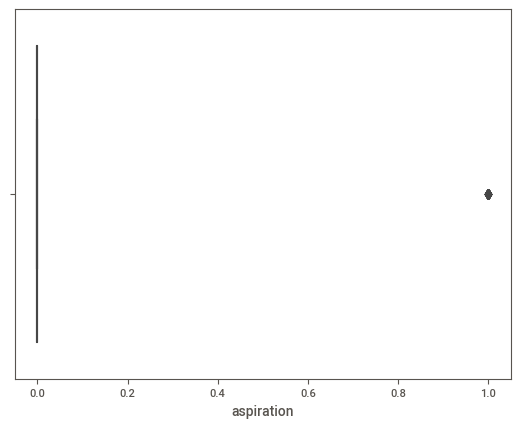

In [505]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['aspiration'])

<AxesSubplot:xlabel='aspiration', ylabel='Count'>

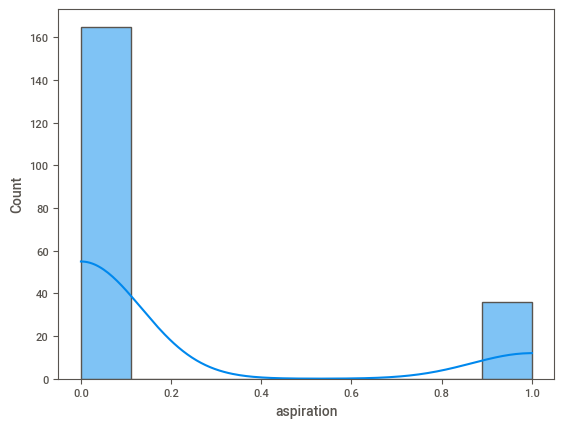

In [506]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['aspiration'],kde=True)

In [507]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['aspiration'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['aspiration'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['aspiration'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_Limit :  0.0
Upper_Limit :  0.0


In [508]:
# outlier present in upper limit
data.loc[(data['aspiration']<Lower_Limit) | (data['aspiration']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
8,1,158,13,0,1,0,0,0,0,105,192,71,55,3086,0,2,131,0,3.13,3.40,8,140,5500,17,20,23875
22,1,118,9,0,1,1,1,0,0,93,157,63,50,2128,0,0,98,0,3.03,3.39,7,102,5500,24,30,7957
26,1,148,9,0,1,0,0,0,0,93,157,63,50,2191,0,0,98,0,3.03,3.39,7,102,5500,24,30,8558
28,3,145,9,0,1,1,1,0,0,95,173,66,50,2811,0,0,156,6,3.60,3.90,7,145,5000,19,24,12964
64,-1,93,10,1,1,0,0,1,0,110,190,70,56,3515,0,2,183,2,3.58,3.64,21,123,4350,22,25,25552
65,-1,93,10,1,1,0,2,1,0,110,190,70,58,3750,0,2,183,2,3.58,3.64,21,123,4350,22,25,28248
66,0,93,10,1,1,1,3,1,0,106,187,70,54,3495,0,2,183,2,3.58,3.64,21,123,4350,22,25,28176
67,-1,93,10,1,1,0,0,1,0,115,202,71,56,3770,0,2,183,2,3.58,3.64,21,123,4350,22,25,31600
72,1,101,21,0,1,1,1,1,0,102,178,68,54,2910,0,0,140,0,3.78,3.12,8,175,5000,19,24,16503
76,1,161,3,0,1,1,1,0,0,93,157,63,50,2145,0,0,98,4,3.03,3.39,7,102,5500,24,30,7689


In [509]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['aspiration']>Upper_Limit,['aspiration']]=data['aspiration'].median()

In [510]:
data.loc[(data['aspiration']<Lower_Limit) | (data['aspiration']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## body-style

<AxesSubplot:xlabel='body-style'>

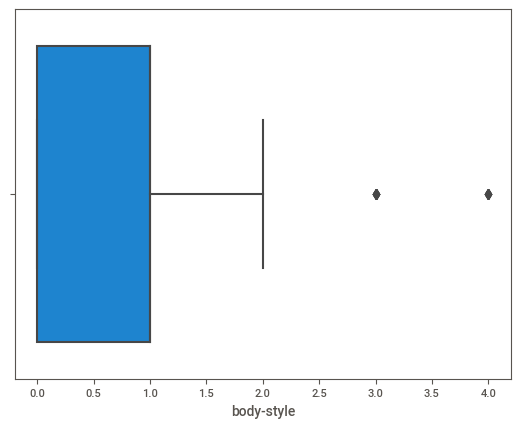

In [511]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['body-style'])

<AxesSubplot:xlabel='body-style', ylabel='Count'>

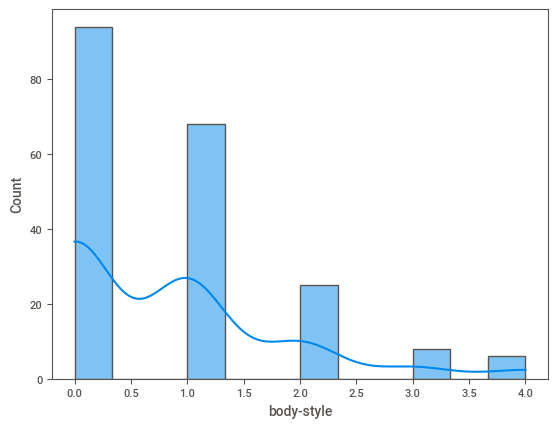

In [512]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['body-style'],kde=True)

In [513]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['body-style'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['body-style'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['body-style'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_Limit :  -1.5
Upper_Limit :  2.5


In [514]:
# outlier present in upper limit
data.loc[(data['body-style']<Lower_Limit) | (data['body-style']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,101,18,0,0,1,4,1,0,88,168,64,48,2548,3,0,130,0,3.47,2.68,9,111,5000,21,27,13495
1,3,101,18,0,0,1,4,1,0,88,168,64,48,2548,3,0,130,0,3.47,2.68,9,111,5000,21,27,16500
66,0,93,10,1,0,1,3,1,0,106,187,70,54,3495,0,2,183,2,3.58,3.64,21,123,4350,22,25,28176
69,3,142,10,0,0,1,4,1,0,96,180,70,50,3685,2,4,234,0,3.46,3.10,8,155,4750,16,18,35056
71,1,101,10,0,0,1,3,1,0,112,199,72,55,3715,2,4,304,0,3.80,3.35,8,184,4500,14,16,45400
95,2,168,1,0,0,1,3,0,0,95,162,63,53,2008,0,0,97,1,3.15,3.29,9,69,5200,31,37,8249
123,3,101,15,0,0,1,3,1,1,89,168,65,51,2756,1,1,194,0,3.74,2.90,9,207,5900,17,25,32528
124,3,101,15,0,0,1,3,1,1,89,168,65,51,2756,1,1,194,0,3.74,2.90,9,207,5900,17,25,34028
125,3,101,15,0,0,1,4,1,1,89,168,65,51,2800,1,1,194,0,3.74,2.90,9,207,5900,17,25,37028
163,2,134,0,0,0,1,3,1,0,98,176,65,52,2540,0,0,146,0,3.62,3.50,9,116,4800,24,30,8449


In [515]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['body-style']>Upper_Limit,['body-style']]=data['body-style'].median()

In [516]:
data.loc[(data['body-style']<Lower_Limit) | (data['body-style']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## wheel-base

<AxesSubplot:xlabel='wheel-base'>

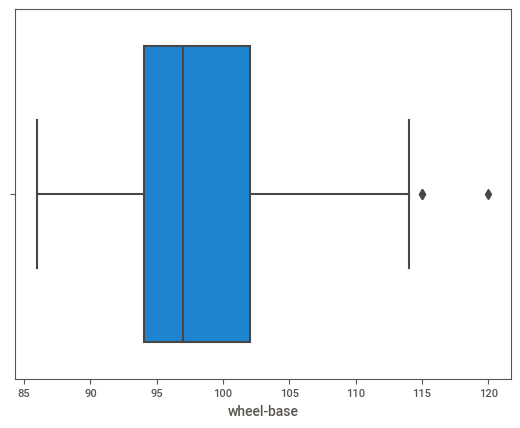

In [517]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['wheel-base'])

<AxesSubplot:xlabel='wheel-base', ylabel='Count'>

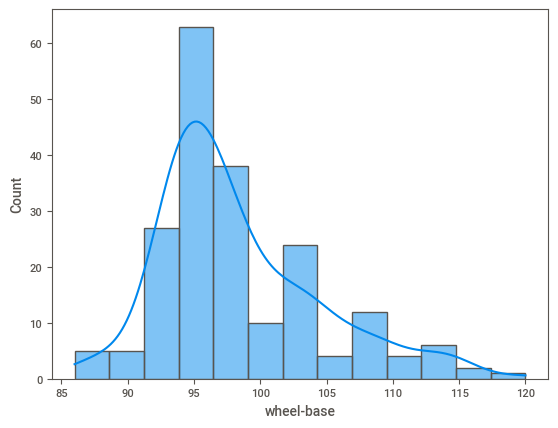

In [518]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['wheel-base'],kde=True)

In [519]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['wheel-base'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['wheel-base'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['wheel-base'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  8.0
Q1 :  94.0
Q3 :  102.0
Lower_Limit :  82.0
Upper_Limit :  114.0


In [520]:
# outlier present in upper limit
data.loc[(data['wheel-base']<Lower_Limit) | (data['wheel-base']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
67,-1,93,10,1,0,0,0,1,0,115,202,71,56,3770,0,2,183,2,3.58,3.64,21,123,4350,22,25,31600
68,-1,101,10,0,0,0,0,1,0,115,202,71,56,3740,2,4,234,0,3.46,3.10,8,155,4750,16,18,34184
70,0,101,10,0,0,0,0,1,0,120,208,71,56,3900,2,4,308,0,3.80,3.35,8,184,4500,14,16,40960


In [521]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['wheel-base']<Lower_Limit,['wheel-base']]=data['wheel-base'].median()

In [522]:
# imputing median on lower limit with the outlier since it's not normally distributed
data.loc[data['wheel-base']>Upper_Limit,['wheel-base']]=data['wheel-base'].median()

In [523]:
data.loc[(data['wheel-base']<Lower_Limit) | (data['wheel-base']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## width

<AxesSubplot:xlabel='width'>

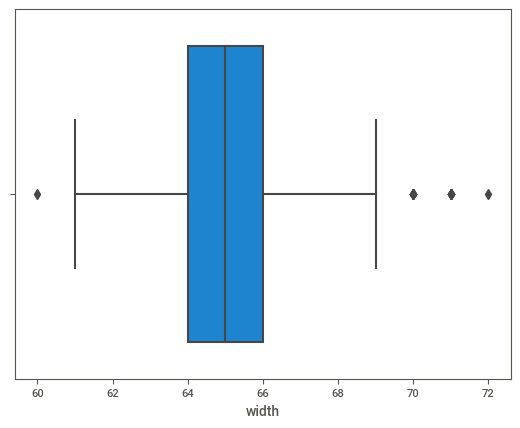

In [524]:
# outlier present in both lower and upper limit as per data visualization using boxplot
sns.boxplot(x=data['width'])

<AxesSubplot:xlabel='width', ylabel='Count'>

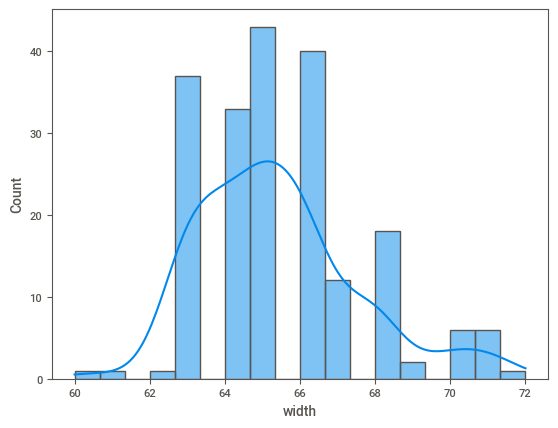

In [525]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['width'],kde=True)

In [526]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['width'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['width'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['width'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  2.0
Q1 :  64.0
Q3 :  66.0
Lower_Limit :  61.0
Upper_Limit :  69.0


In [527]:
# outlier present in both lower and upper limit
data.loc[(data['width']<Lower_Limit) | (data['width']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
6,1,158,13,0,0,0,0,0,0,105,192,71,55,2844,0,2,136,0,3.19,3.40,8,110,5500,19,25,17710
7,1,101,13,0,0,0,2,0,0,105,192,71,55,2954,0,2,136,0,3.19,3.40,8,110,5500,19,25,18920
8,1,158,13,0,0,0,0,0,0,105,192,71,55,3086,0,2,131,0,3.13,3.40,8,140,5500,17,20,23875
16,0,101,11,0,0,0,0,1,0,110,197,70,56,3505,0,1,209,0,3.62,3.39,8,182,5400,15,20,36880
17,2,121,17,0,0,1,1,0,0,88,141,60,53,1488,4,5,61,1,2.91,3.03,9,48,5100,47,53,5151
46,0,101,16,0,0,1,0,1,0,102,191,70,47,3950,2,6,326,0,3.54,2.76,11,262,5000,13,17,36000
64,-1,93,10,1,0,0,0,1,0,110,190,70,56,3515,0,2,183,2,3.58,3.64,21,123,4350,22,25,25552
65,-1,93,10,1,0,0,2,1,0,110,190,70,58,3750,0,2,183,2,3.58,3.64,21,123,4350,22,25,28248
66,0,93,10,1,0,1,1,1,0,106,187,70,54,3495,0,2,183,2,3.58,3.64,21,123,4350,22,25,28176
67,-1,93,10,1,0,0,0,1,0,97,202,71,56,3770,0,2,183,2,3.58,3.64,21,123,4350,22,25,31600


In [528]:
# imputing median on lower limit with the outlier since it's not normally distributed
data.loc[data['width']<Lower_Limit,['width']]=data['width'].median()

In [529]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['width']>Upper_Limit,['width']]=data['width'].median()

In [530]:
data.loc[(data['width']<Lower_Limit) | (data['width']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## height

<AxesSubplot:xlabel='height'>

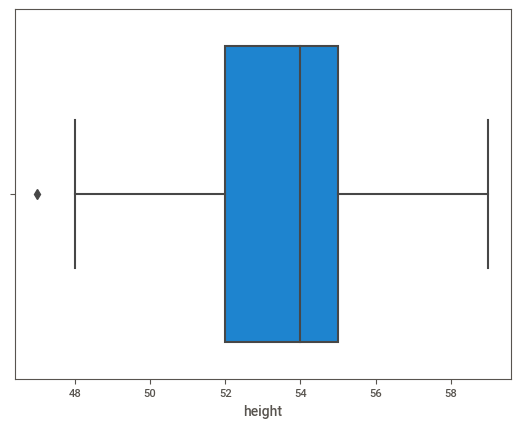

In [531]:
# outlier present in lower limit as per data visualization using boxplot
sns.boxplot(x=data['height'])

<AxesSubplot:xlabel='height', ylabel='Count'>

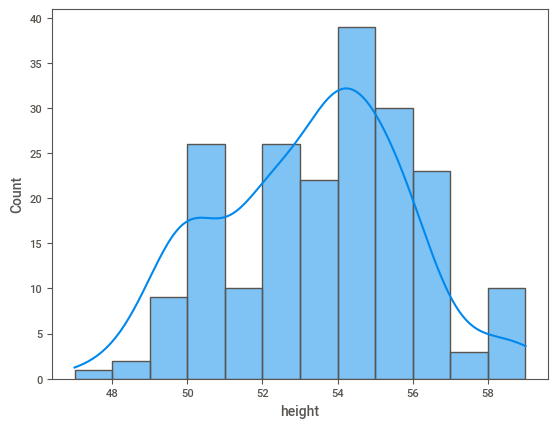

In [532]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['height'],kde=True)

In [533]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['height'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['height'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['height'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  3.0
Q1 :  52.0
Q3 :  55.0
Lower_Limit :  47.5
Upper_Limit :  59.5


In [ ]:
# outlier present in lower limit
data.loc[(data['height']<Lower_Limit) | (data['height']>Upper_Limit)]

In [535]:
# imputing median on lower limit with the outlier since it's not normally distributed
data.loc[data['height']<Lower_Limit,['height']]=data['height'].median()

In [536]:
data.loc[(data['height']<Lower_Limit) | (data['height']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## curb-weight

<AxesSubplot:xlabel='curb-weight'>

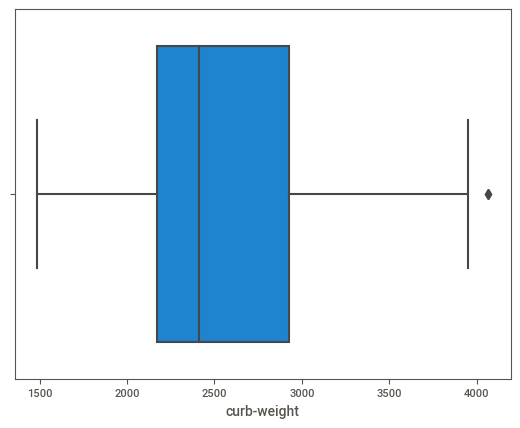

In [537]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['curb-weight'])

<AxesSubplot:xlabel='curb-weight', ylabel='Count'>

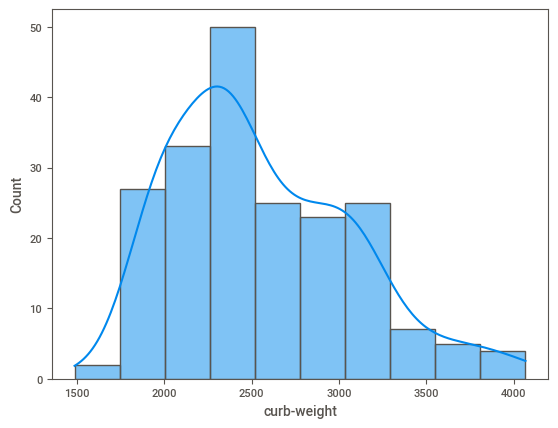

In [538]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['curb-weight'],kde=True)

In [539]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['curb-weight'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['curb-weight'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['curb-weight'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  757.0
Q1 :  2169.0
Q3 :  2926.0
Lower_Limit :  1033.5
Upper_Limit :  4061.5


In [540]:
# outlier present in upper limit
data.loc[(data['curb-weight']<Lower_Limit) | (data['curb-weight']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
44,0,145,16,0,0,0,0,1,0,113,199,69,52,4066,3,1,258,0,3.63,4.17,8,176,4750,15,19,32250
45,0,101,16,0,0,0,0,1,0,113,199,69,52,4066,3,1,258,0,3.63,4.17,8,176,4750,15,19,35550


In [541]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['curb-weight']>Upper_Limit,['curb-weight']]=data['curb-weight'].median()

In [542]:
data.loc[(data['curb-weight']<Lower_Limit) | (data['curb-weight']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## engine-type

<AxesSubplot:xlabel='engine-type'>

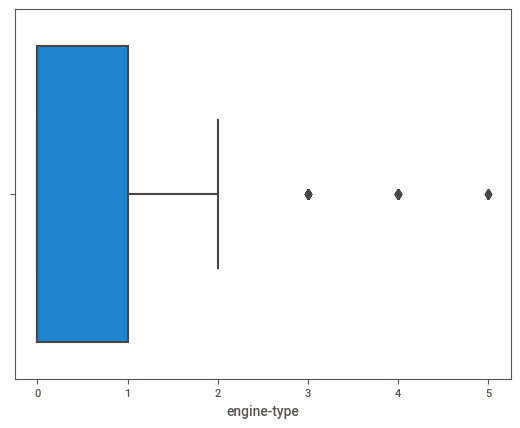

In [543]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['engine-type'])

<AxesSubplot:xlabel='engine-type', ylabel='Count'>

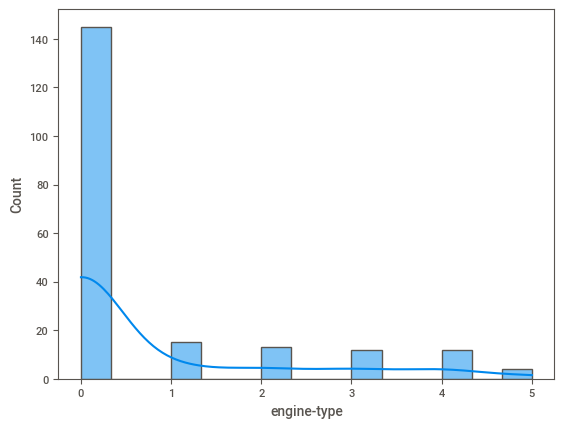

In [544]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['engine-type'],kde=True)

In [545]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['engine-type'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['engine-type'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['engine-type'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_Limit :  -1.5
Upper_Limit :  2.5


In [546]:
# outlier present in upper limit
data.loc[(data['engine-type']<Lower_Limit) | (data['engine-type']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,101,18,0,0,1,1,1,0,88,168,64,48,2548,3,0,130,0,3.47,2.68,9,111,5000,21,27,13495
1,3,101,18,0,0,1,1,1,0,88,168,64,48,2548,3,0,130,0,3.47,2.68,9,111,5000,21,27,16500
17,2,121,17,0,0,1,1,0,0,88,141,65,53,1488,4,5,61,1,2.91,3.03,9,48,5100,47,53,5151
44,0,145,16,0,0,0,0,1,0,113,199,69,52,2414,3,1,258,0,3.63,4.17,8,176,4750,15,19,32250
45,0,101,16,0,0,0,0,1,0,113,199,69,52,2414,3,1,258,0,3.63,4.17,8,176,4750,15,19,35550
52,3,150,2,0,0,1,1,1,0,95,169,65,49,2380,5,3,70,5,3.62,3.40,9,101,6000,17,23,10945
53,3,150,2,0,0,1,1,1,0,95,169,65,49,2380,5,3,70,5,3.62,3.40,9,101,6000,17,23,11845
54,3,150,2,0,0,1,1,1,0,95,169,65,49,2385,5,3,70,5,3.62,3.40,9,101,6000,17,23,13645
55,3,150,2,0,0,1,1,1,0,95,169,65,49,2500,5,3,80,0,3.62,3.40,9,135,6000,16,23,15645
104,0,161,7,0,0,0,0,1,0,107,186,68,56,3020,4,0,120,0,3.46,3.19,8,97,5000,19,24,11900


In [547]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['engine-type']>Upper_Limit,['engine-type']]=data['engine-type'].median()

In [548]:
data.loc[(data['engine-type']<Lower_Limit) | (data['engine-type']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## engine-size

<AxesSubplot:xlabel='engine-size'>

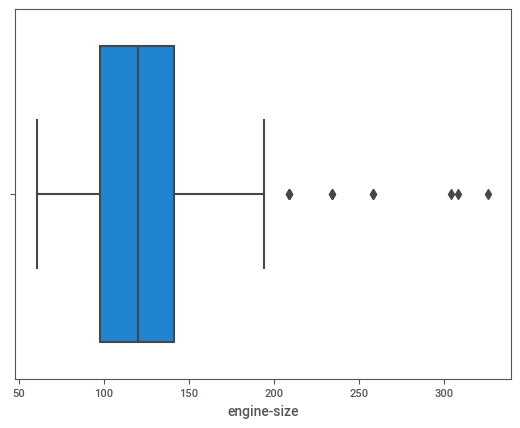

In [549]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['engine-size'])

<AxesSubplot:xlabel='engine-size', ylabel='Count'>

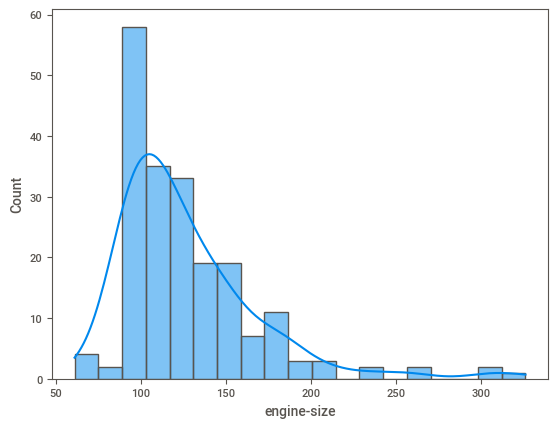

In [550]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['engine-size'],kde=True)

In [551]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['engine-size'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['engine-size'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['engine-size'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  43.0
Q1 :  98.0
Q3 :  141.0
Lower_Limit :  33.5
Upper_Limit :  205.5


In [552]:
# outlier present in upper limit
data.loc[(data['engine-size']<Lower_Limit) | (data['engine-size']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
14,0,101,11,0,0,0,0,1,0,103,189,66,55,3230,0,1,209,0,3.62,3.39,8,182,5400,16,22,30760
15,0,101,11,0,0,1,0,1,0,103,193,67,53,3380,0,1,209,0,3.62,3.39,8,182,5400,16,22,41315
16,0,101,11,0,0,0,0,1,0,110,197,65,56,3505,0,1,209,0,3.62,3.39,8,182,5400,15,20,36880
44,0,145,16,0,0,0,0,1,0,113,199,69,52,2414,0,1,258,0,3.63,4.17,8,176,4750,15,19,32250
45,0,101,16,0,0,0,0,1,0,113,199,69,52,2414,0,1,258,0,3.63,4.17,8,176,4750,15,19,35550
46,0,101,16,0,0,1,0,1,0,102,191,65,54,3950,2,6,326,0,3.54,2.76,11,262,5000,13,17,36000
68,-1,101,10,0,0,0,0,1,0,97,202,65,56,3740,2,4,234,0,3.46,3.10,8,155,4750,16,18,34184
69,3,142,10,0,0,1,1,1,0,96,180,65,50,3685,2,4,234,0,3.46,3.10,8,155,4750,16,18,35056
70,0,101,10,0,0,0,0,1,0,97,208,65,56,3900,2,4,308,0,3.80,3.35,8,184,4500,14,16,40960
71,1,101,10,0,0,1,1,1,0,112,199,65,55,3715,2,4,304,0,3.80,3.35,8,184,4500,14,16,45400


In [553]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['engine-size']>Upper_Limit,['engine-size']]=data['engine-size'].median()

In [554]:
data.loc[(data['engine-size']<Lower_Limit) | (data['engine-size']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## fuel-system

<AxesSubplot:xlabel='fuel-system'>

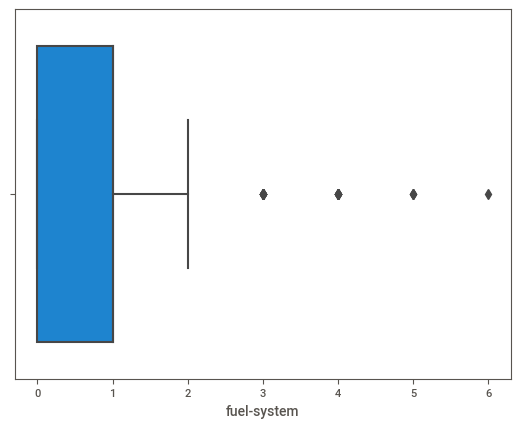

In [555]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['fuel-system'])

<AxesSubplot:xlabel='fuel-system', ylabel='Count'>

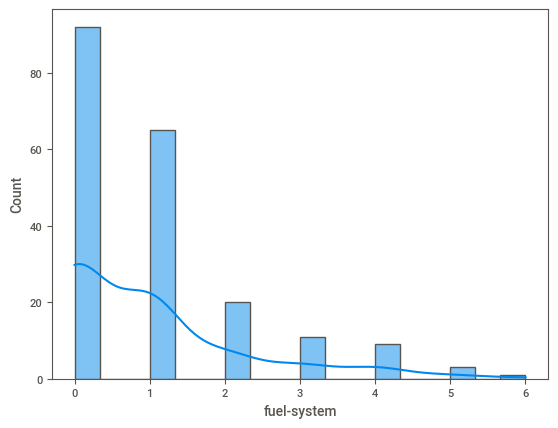

In [556]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['fuel-system'],kde=True)

In [557]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['fuel-system'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['fuel-system'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['fuel-system'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_Limit :  -1.5
Upper_Limit :  2.5


In [558]:
# outlier present in upper limit
data.loc[(data['fuel-system']<Lower_Limit) | (data['fuel-system']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,3,145,9,0,0,1,1,0,0,95,173,66,50,2811,0,0,156,6,3.60,3.90,7,145,5000,19,24,12964
29,2,137,4,0,0,1,1,0,0,86,144,63,50,1713,0,0,92,3,2.91,3.41,9,58,4800,49,54,6479
30,2,137,4,0,0,1,1,0,0,86,144,63,50,1819,0,0,92,3,2.91,3.41,9,76,6000,31,38,6855
31,1,101,4,0,0,1,1,0,0,93,150,64,52,1837,0,0,79,3,2.91,3.07,10,60,5500,38,42,5399
32,1,101,4,0,0,1,1,0,0,93,150,64,52,1940,0,0,92,3,2.91,3.41,9,76,6000,30,34,6529
33,1,101,4,0,0,1,1,0,0,93,150,64,52,1956,0,0,92,3,2.91,3.41,9,76,6000,30,34,7129
34,0,110,4,0,0,0,0,0,0,96,163,64,54,2010,0,0,92,3,2.91,3.41,9,76,6000,30,34,7295
35,0,78,4,0,0,0,2,0,0,96,157,63,58,2024,0,0,92,3,2.92,3.41,9,76,6000,30,34,7295
36,0,106,4,0,0,1,1,0,0,96,167,65,53,2236,0,0,110,3,3.15,3.58,9,86,5800,27,33,7895
37,0,106,4,0,0,1,1,0,0,96,167,65,53,2289,0,0,110,3,3.15,3.58,9,86,5800,27,33,9095


In [559]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['fuel-system']>Upper_Limit,['fuel-system']]=data['fuel-system'].median()

In [560]:
data.loc[(data['fuel-system']<Lower_Limit) | (data['fuel-system']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## stroke

<AxesSubplot:xlabel='stroke'>

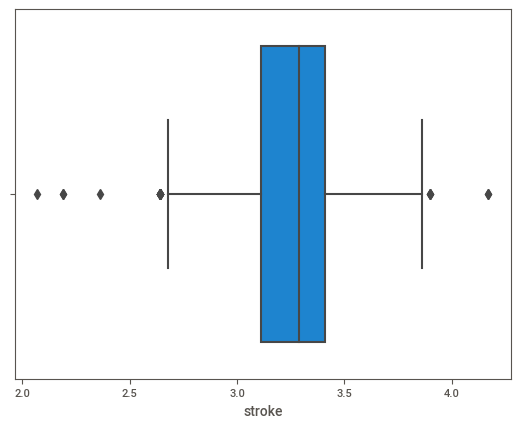

In [561]:
# outlier present in both lower and upper limit as per data visualization using boxplot
sns.boxplot(x=data['stroke'])

<AxesSubplot:xlabel='stroke', ylabel='Count'>

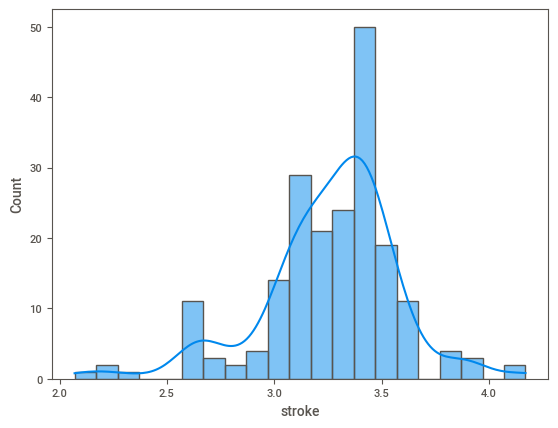

In [562]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['stroke'],kde=True)

In [563]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['stroke'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['stroke'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['stroke'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  0.30000000000000027
Q1 :  3.11
Q3 :  3.41
Lower_Limit :  2.6599999999999993
Upper_Limit :  3.8600000000000003


In [564]:
# outlier present in both lower and upper limit
data.loc[(data['stroke']<Lower_Limit) | (data['stroke']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
28,3,145,9,0,0,1,1,0,0,95,173,66,50,2811,0,0,156,1,3.60,3.90,7,145,5000,19,24,12964
44,0,145,16,0,0,0,0,1,0,113,199,69,52,2414,0,1,120,0,3.63,4.17,8,176,4750,15,19,32250
45,0,101,16,0,0,0,0,1,0,113,199,69,52,2414,0,1,120,0,3.63,4.17,8,176,4750,15,19,35550
108,0,161,7,0,0,0,0,1,0,107,186,68,56,3075,0,0,120,0,3.46,2.19,8,95,5000,19,24,15580
110,0,101,7,0,0,0,2,1,0,114,198,68,56,3285,0,0,120,0,3.46,2.19,8,95,5000,19,24,16695
126,0,101,20,0,0,0,2,0,0,96,181,66,55,2579,0,0,132,0,3.46,3.90,8,68,4800,23,31,9295
127,2,101,20,0,0,1,1,0,0,96,176,66,50,2460,0,0,132,0,3.46,3.90,8,68,4800,23,31,9895
130,3,150,14,0,0,1,1,0,0,99,186,66,56,2707,0,0,121,0,2.54,2.07,9,110,5250,21,28,15040
134,2,83,6,0,0,1,1,0,0,93,156,63,53,2050,1,0,97,1,3.62,2.36,9,69,4900,31,36,5118
135,2,83,6,0,0,1,1,0,0,93,157,63,53,2120,1,0,108,1,3.62,2.64,8,73,4400,26,31,7053


In [565]:
# imputing median on lower limit with the outlier since it's not normally distributed
data.loc[data['stroke']<Lower_Limit,['stroke']]=data['stroke'].median()

In [566]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['stroke']>Upper_Limit,['stroke']]=data['stroke'].median()

In [567]:
data.loc[(data['stroke']<Lower_Limit) | (data['stroke']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## compression-ratio

<AxesSubplot:xlabel='compression-ratio'>

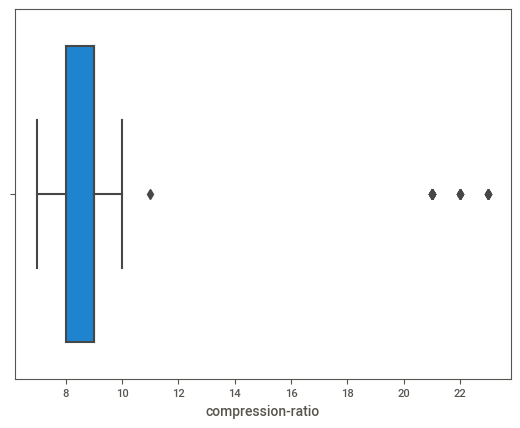

In [568]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['compression-ratio'])

<AxesSubplot:xlabel='compression-ratio', ylabel='Count'>

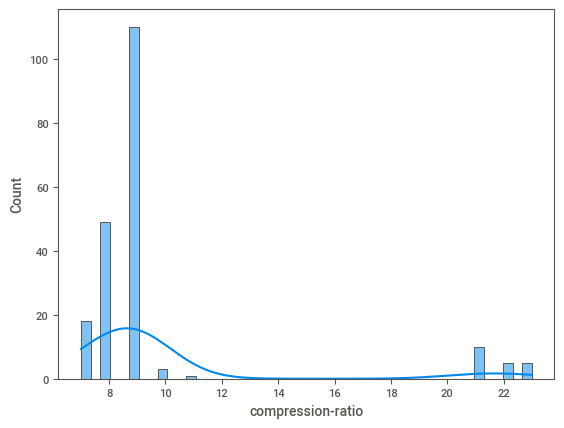

In [569]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['compression-ratio'],kde=True)

In [570]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['compression-ratio'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['compression-ratio'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['compression-ratio'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  1.0
Q1 :  8.0
Q3 :  9.0
Lower_Limit :  6.5
Upper_Limit :  10.5


In [571]:
# outlier present in upper limit
data.loc[(data['compression-ratio']<Lower_Limit) | (data['compression-ratio']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
46,0,101,16,0,0,1,0,1,0,102,191,65,54,3950,2,6,120,0,3.54,2.76,11,262,5000,13,17,36000
60,0,101,2,1,0,0,0,0,0,98,177,66,55,2443,0,0,122,2,3.39,3.39,22,64,4650,36,42,10795
63,0,101,2,1,0,0,0,1,0,104,175,66,54,2700,0,0,134,2,3.43,3.64,22,72,4200,31,39,18344
64,-1,93,10,1,0,0,0,1,0,110,190,65,56,3515,0,2,183,2,3.58,3.64,21,123,4350,22,25,25552
65,-1,93,10,1,0,0,2,1,0,110,190,65,58,3750,0,2,183,2,3.58,3.64,21,123,4350,22,25,28248
66,0,93,10,1,0,1,1,1,0,106,187,65,54,3495,0,2,183,2,3.58,3.64,21,123,4350,22,25,28176
67,-1,93,10,1,0,0,0,1,0,97,202,65,56,3770,0,2,183,2,3.58,3.64,21,123,4350,22,25,31600
87,1,128,1,1,0,1,0,0,0,94,165,63,54,2017,0,0,103,2,2.99,3.47,21,55,4800,45,50,7099
105,0,161,7,1,0,0,0,1,0,107,186,68,56,3197,0,0,152,2,3.70,3.52,21,95,4150,28,33,13200
107,0,101,7,1,0,0,2,1,0,114,198,68,58,3430,0,0,152,2,3.70,3.52,21,95,4150,25,25,13860


In [572]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['compression-ratio']>Upper_Limit,['compression-ratio']]=data['compression-ratio'].median()

In [573]:
data.loc[(data['compression-ratio']<Lower_Limit) | (data['compression-ratio']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## horsepower

<AxesSubplot:xlabel='horsepower'>

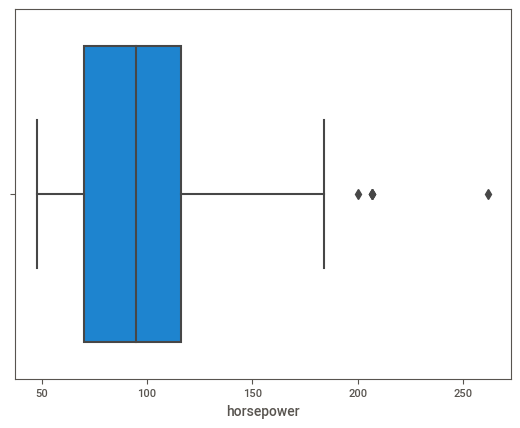

In [574]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['horsepower'])

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

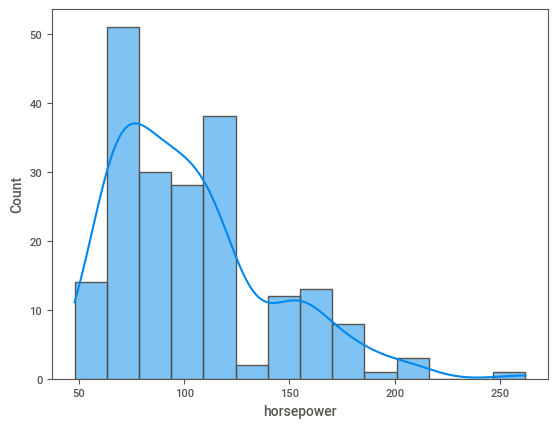

In [575]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['horsepower'],kde=True)

In [576]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['horsepower'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['horsepower'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['horsepower'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  46.0
Q1 :  70.0
Q3 :  116.0
Lower_Limit :  1.0
Upper_Limit :  185.0


In [577]:
# outlier present in upper limit
data.loc[(data['horsepower']<Lower_Limit) | (data['horsepower']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
46,0,101,16,0,0,1,0,1,0,102,191,65,54,3950,2,6,120,0,3.54,2.76,9,262,5000,13,17,36000
102,3,104,1,0,0,1,1,1,0,91,170,67,49,3139,2,1,181,0,3.43,3.27,7,200,5200,17,23,19699
123,3,101,15,0,0,1,1,1,1,89,168,65,51,2756,1,1,194,0,3.74,2.90,9,207,5900,17,25,32528
124,3,101,15,0,0,1,1,1,1,89,168,65,51,2756,1,1,194,0,3.74,2.90,9,207,5900,17,25,34028
125,3,101,15,0,0,1,1,1,1,89,168,65,51,2800,1,1,194,0,3.74,2.90,9,207,5900,17,25,37028


In [578]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['horsepower']>Upper_Limit,['horsepower']]=data['horsepower'].median()

In [579]:
data.loc[(data['horsepower']<Lower_Limit) | (data['horsepower']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## city-mpg

<AxesSubplot:xlabel='city-mpg'>

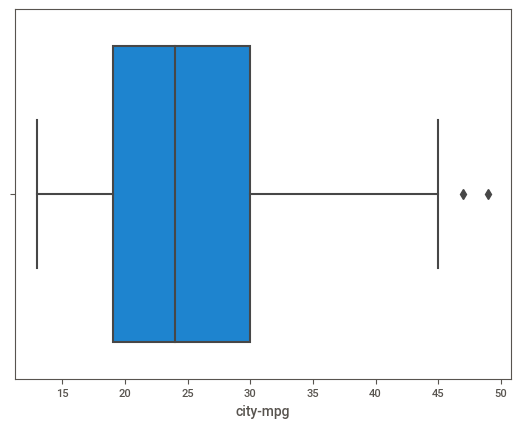

In [580]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['city-mpg'])

<AxesSubplot:xlabel='city-mpg', ylabel='Count'>

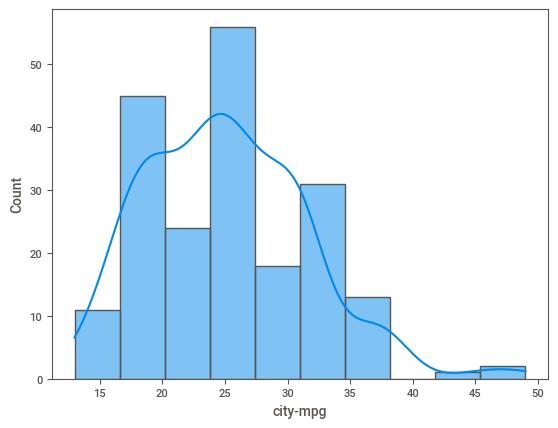

In [581]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['city-mpg'],kde=True)

In [582]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['city-mpg'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['city-mpg'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['city-mpg'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  11.0
Q1 :  19.0
Q3 :  30.0
Lower_Limit :  2.5
Upper_Limit :  46.5


In [583]:
# outlier present in upper limit
data.loc[(data['city-mpg']<Lower_Limit) | (data['city-mpg']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
17,2,121,17,0,0,1,1,0,0,88,141,65,53,1488,0,5,61,1,2.91,3.03,9,48,5100,47,53,5151
29,2,137,4,0,0,1,1,0,0,86,144,63,50,1713,0,0,92,1,2.91,3.41,9,58,4800,49,54,6479


In [584]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['city-mpg']>Upper_Limit,['city-mpg']]=data['city-mpg'].median()

In [585]:
data.loc[(data['city-mpg']<Lower_Limit) | (data['city-mpg']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## highway-mpg

<AxesSubplot:xlabel='highway-mpg'>

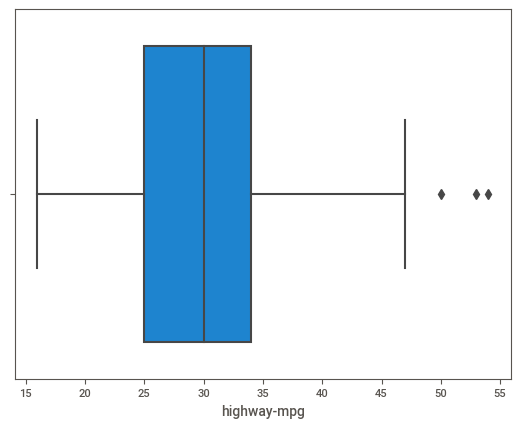

In [586]:
# outlier present in upper limit as per data visualization using boxplot
sns.boxplot(x=data['highway-mpg'])

<AxesSubplot:xlabel='highway-mpg', ylabel='Count'>

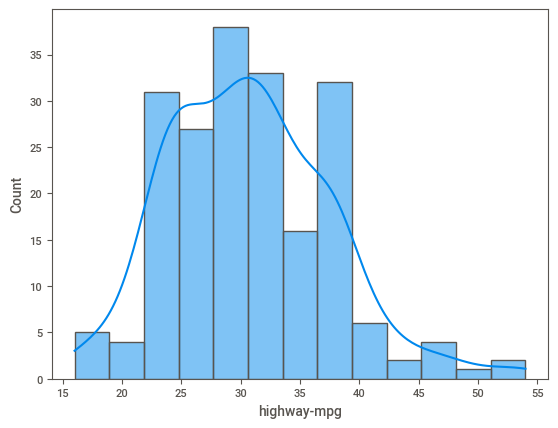

In [587]:
# checking distribution using histplot & data are not normally distributed
sns.histplot(x=data['highway-mpg'],kde=True)

In [588]:
# finding lower & upper limit using IQR since data are not normally distributed
IQR=stats.iqr(data['highway-mpg'],interpolation='midpoint')
print('IQR : ',IQR)

Q1=data['highway-mpg'].quantile(0.25)
print('Q1 : ',Q1)

Q3=data['highway-mpg'].quantile(0.75)
print('Q3 : ',Q3)

Lower_Limit=Q1-1.5*IQR
print('Lower_Limit : ',Lower_Limit)

Upper_Limit=Q3+1.5*IQR
print('Upper_Limit : ',Upper_Limit)

IQR :  9.0
Q1 :  25.0
Q3 :  34.0
Lower_Limit :  11.5
Upper_Limit :  47.5


In [589]:
# outlier present in upper limit
data.loc[(data['highway-mpg']<Lower_Limit) | (data['highway-mpg']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
17,2,121,17,0,0,1,1,0,0,88,141,65,53,1488,0,5,61,1,2.91,3.03,9,48,5100,24,53,5151
29,2,137,4,0,0,1,1,0,0,86,144,63,50,1713,0,0,92,1,2.91,3.41,9,58,4800,24,54,6479
87,1,128,1,1,0,1,0,0,0,94,165,63,54,2017,0,0,103,2,2.99,3.47,9,55,4800,45,50,7099


In [590]:
# imputing median on upper limit with the outlier since it's not normally distributed
data.loc[data['highway-mpg']>Upper_Limit,['highway-mpg']]=data['highway-mpg'].median()

In [591]:
data.loc[(data['highway-mpg']<Lower_Limit) | (data['highway-mpg']>Upper_Limit)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


# Feature Engineering

In [592]:
# Checking Correlation
data.corr()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.351237,0.086115,-0.196735,NaN,0.672344,0.132844,-0.107764,0.212339,-0.518928,-0.363269,-0.194242,-0.554041,-0.221397,0.003881,0.066160,-0.061606,-0.099916,-0.101604,-0.019331,0.035208,-0.013716,0.278269,-0.074989,0.002736,-0.082391
normalized-losses,0.351237,1.000000,0.055890,-0.085869,NaN,0.265186,-0.192877,0.031375,-0.058859,-0.091824,-0.087921,-0.014705,-0.309225,-0.078192,-0.158649,0.057991,-0.083751,-0.042149,-0.098117,-0.011525,0.004911,0.036435,0.225779,-0.077231,-0.035012,-0.033908
make,0.086115,0.055890,1.000000,-0.049689,NaN,0.008334,-0.044227,0.165609,0.201303,0.133942,0.235737,0.151819,0.012357,0.256500,0.066169,0.240311,0.172617,-0.249028,0.181227,-0.255966,-0.109252,0.257717,0.085266,-0.353098,-0.322218,0.419402
fuel-type,-0.196735,-0.085869,-0.049689,1.000000,NaN,-0.186681,-0.123923,0.056508,-0.040917,0.291168,0.209445,0.179398,0.262270,0.242222,-0.125538,0.012648,0.185823,0.689389,0.046748,0.307913,0.202048,-0.158947,-0.472525,0.297694,0.180633,0.110326
aspiration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,0.672344,0.265186,0.008334,-0.186681,NaN,1.000000,0.226663,-0.016438,0.142340,-0.435219,-0.394046,-0.213987,-0.521188,-0.189241,0.045756,0.108260,-0.041652,-0.049041,-0.093186,-0.029132,0.031231,0.008736,0.230561,-0.016576,-0.011869,-0.042435
body-style,0.132844,-0.192877,-0.044227,-0.123923,NaN,0.226663,1.000000,0.078779,0.061362,-0.079067,-0.109480,-0.082969,0.031612,0.018782,0.041127,-0.048265,0.015423,-0.007903,0.025012,0.003167,-0.001607,-0.061156,0.015048,-0.039982,-0.048112,-0.126342
drive-wheels,-0.107764,0.031375,0.165609,0.056508,NaN,-0.016438,0.078779,1.000000,0.117735,0.350335,0.412770,0.354998,0.164653,0.560327,0.232434,0.262642,0.376723,-0.244341,0.540210,-0.162844,-0.076120,0.416365,-0.151233,-0.491908,-0.545490,0.486829
engine-location,0.212339,-0.058859,0.201303,-0.040917,NaN,0.142340,0.061362,0.117735,1.000000,-0.196803,-0.057613,-0.004720,-0.117673,0.057732,0.181411,0.074183,0.327027,-0.120627,0.183669,-0.244136,0.074818,-0.018976,0.202311,-0.163312,-0.105414,0.331062
wheel-base,-0.518928,-0.091824,0.133942,0.291168,NaN,-0.435219,-0.079067,0.350335,-0.196803,1.000000,0.818334,0.710815,0.586779,0.662777,-0.043695,0.138388,0.414748,-0.138014,0.461453,0.170089,-0.156355,0.467646,-0.316993,-0.399324,-0.462192,0.483326


<AxesSubplot:>

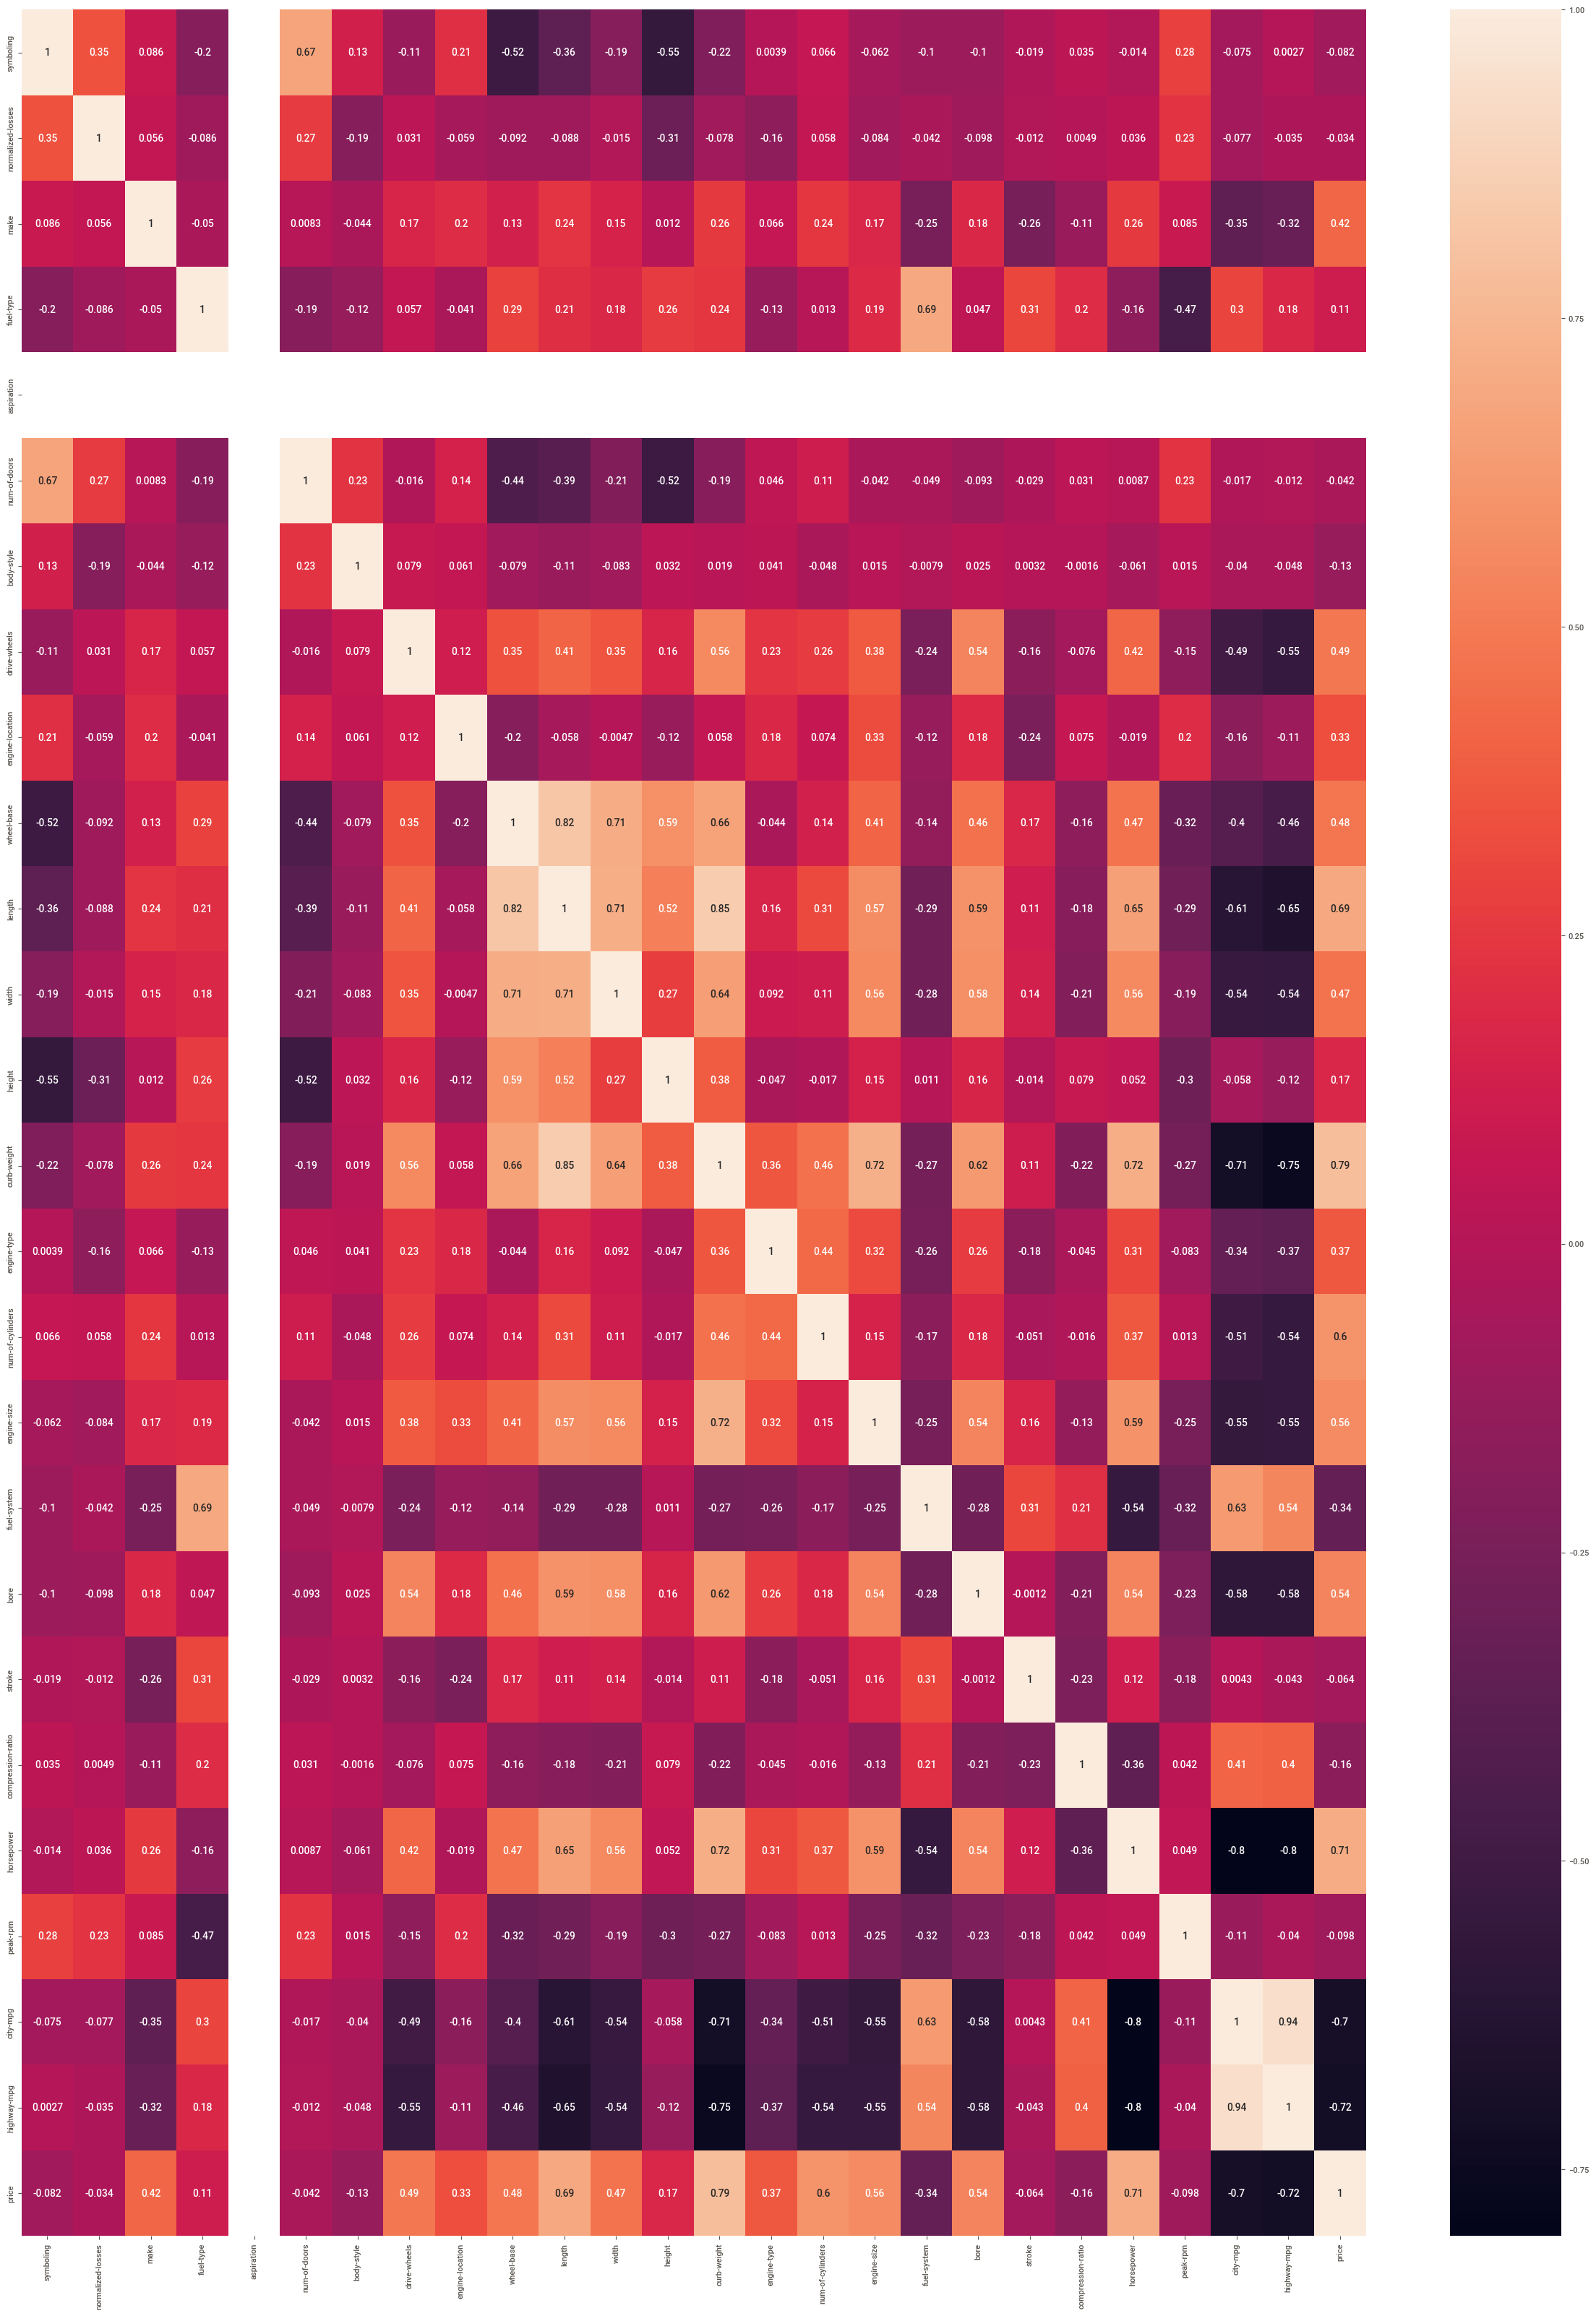

In [593]:
# heatmap
plt.figure(figsize=(30,40))
sns.heatmap(data.corr(),annot=True)

In [594]:
data.drop(['aspiration'],inplace=True,axis=1)

In [595]:
data.info(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    int64  
 3   fuel-type          201 non-null    int64  
 4   num-of-doors       201 non-null    int64  
 5   body-style         201 non-null    int64  
 6   drive-wheels       201 non-null    int64  
 7   engine-location    201 non-null    int64  
 8   wheel-base         201 non-null    int64  
 9   length             201 non-null    int64  
 10  width              201 non-null    int64  
 11  height             201 non-null    int64  
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    int64  
 14  num-of-cylinders   201 non-null    int64  
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

## Task 2:-Create a predictive model by applying some data science techniques for theprice of cars with the available independent variables. That should help themanagement to understand how exactly the prices vary with the independent variables.They can accordingly manipulate the design of the cars, the business strategy etc. tomeet certain price levels

## Spliting Data

In [596]:
x=data.drop('price',axis=1)

In [597]:
y=data['price']

In [598]:
x

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,101,18,0,1,1,1,0,88,168,64,48,2548,0,0,130,0,3.47,2.68,9,111,5000,21,27
1,3,101,18,0,1,1,1,0,88,168,64,48,2548,0,0,130,0,3.47,2.68,9,111,5000,21,27
2,1,101,18,0,1,1,1,0,94,171,65,52,2823,2,1,152,0,2.68,3.47,9,154,5000,19,26
3,2,164,13,0,0,0,0,0,99,176,66,54,2337,0,0,109,0,3.19,3.40,10,102,5500,24,30
4,2,164,13,0,0,0,2,0,99,176,66,54,2824,0,2,136,0,3.19,3.40,8,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,8,0,0,0,1,0,109,188,68,55,2952,0,0,141,0,3.78,3.15,9,114,5400,23,28
197,-1,95,8,0,0,0,1,0,109,188,68,55,3049,0,0,141,0,3.78,3.15,8,160,5300,19,25
198,-1,95,8,0,0,0,1,0,109,188,68,55,3012,2,1,173,0,3.58,2.87,8,134,5500,18,23
199,-1,95,8,1,0,0,1,0,109,188,68,55,3217,0,1,145,2,3.01,3.40,9,106,4800,26,27


In [599]:
y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
196    16845
197    19045
198    21485
199    22470
200    22625
Name: price, Length: 201, dtype: int64

In [600]:
from sklearn.model_selection import train_test_split

In [601]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [602]:
# shape of x_train
x_train.shape

(150, 24)

In [603]:
# shape of y_train
y_train.shape

(150,)

## Model creation 

## Linear Regression

In [604]:
from sklearn.linear_model import LinearRegression #importing Lenier regression from sklearn liberary
LR=LinearRegression() #initialize the model
LR.fit(x_train,y_train) # Train model with x_train and y-train

LinearRegression()

In [605]:
y_pred_LR=LR.predict(x_test) #predict using x_test

In [606]:
y_train_pred_LR=LR.predict(x_train) #predict using x_train

## EVALUATION OF LINEAR REGRESSION

In [607]:
# importing accuracy function and error functions
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [608]:
#r2 score of train data
R2_train=r2_score(y_train,y_train_pred_LR)
R2_train

0.8730668470256413

In [609]:
# r2 Score of test data
R2_LR=r2_score(y_test,y_pred_LR)
R2_LR

0.8614153310040417

- Model has learn 86% of the information
- Linear Regression is Genaralized Model Model

In [610]:
#mean absolute error
MAE_LR=mean_absolute_error(y_test,y_pred_LR)
MAE_LR

2673.176911268627

In [611]:
# mean square error
MSE_LR=mean_squared_error(y_test,y_pred_LR)
MSE_LR

14955124.394660454

In [612]:
#root mean square error
RMSE_LR=np.sqrt(MSE_LR)
RMSE_LR

3867.185590925325

In [613]:
#adjusted R2 score
ADJUST_R2_LR=1-(1-R2_LR)*(50-1)/(50-24-1)
ADJUST_R2_LR

0.7283740487679217

# KNN REGRESSION

In [614]:
# Import KNN algorithm
from sklearn.neighbors import KNeighborsRegressor
# Create Empty List To Store Error Values
Error_rate=[]

for i in range(1,11):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    Error_rate.append(np.mean(y_test!=y_pred))
Error_rate

[0.9607843137254902, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

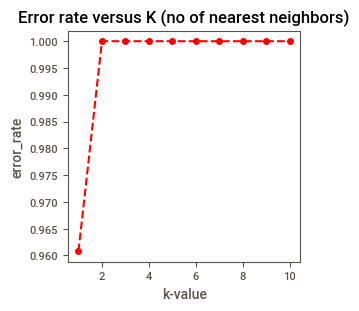

In [615]:
# Finding Best "K" Value in KNN Classifier
plt.figure(figsize=(3,3))
plt.plot(range(1,11),Error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [616]:
from sklearn.neighbors import KNeighborsRegressor # import KNN from sklearn
KNNR=KNeighborsRegressor(n_neighbors=2) #initialize the model
KNNR.fit(x_train,y_train) #train the model
y_pred_KNNR=KNNR.predict(x_test)#predict using x_test

In [617]:
y_train_pred_KNNR=KNNR.predict(x_train)#predict using X_train

# EVALUATION OF KNN REGRESSION

In [618]:
#r2 score of train data
R2_train_KNNR=r2_score(y_train,y_train_pred_KNNR)
R2_train_KNNR

0.9135168896593961

In [619]:
#r2 score of test data
R2_KNNR=r2_score(y_test,y_pred_KNNR)
R2_KNNR

0.6838680091617266

- Model has learn 68% of the information
- KNN Regression is Overfitting Model Model

In [620]:
# mean absolute error
MAE_KNNR=mean_absolute_error(y_test,y_pred_KNNR)
MAE_KNNR

3293.7450980392155

In [621]:
# mean square error
MSE_KNNR=mean_squared_error(y_test,y_pred_KNNR)
MSE_KNNR

34114835.950980395

In [622]:
#root mean square error
RMSE_KNNR=np.sqrt(MSE_KNNR)
RMSE_KNNR

5840.7906957004025

In [623]:
#adjusted R2 score
ADJUST_R2_KNNR=1-(1-R2_KNNR)*(50-1)/(50-24-1)
ADJUST_R2_KNNR

0.38038129795698417

# SUPPORT VECTOR MACHINE (SVM) REGRESSION

In [625]:
from sklearn.svm import SVR # import SVR from sklearn
SVMR=SVR() #initialize the model

In [626]:
SVMR.fit(x_train,y_train) #train the model

SVR()

In [627]:
y_pred_SVMR=SVMR.predict(x_test) #predict using X_test

In [628]:
y_train_pred_SVMR=SVMR.predict(x_train) #predict using X_train

# EVALUATION OF SUPPORT VECTOR MACHINE (SVM) REGRESSION

In [629]:
#r2 score of train data
R2_train_SVMR=r2_score(y_train,y_train_pred_SVMR)
R2_train_SVMR

-0.08193754723436908

In [630]:
#r2 score of test data
R2_SVMR=r2_score(y_test,y_pred_SVMR)
R2_SVMR

-0.1763318490399286

- Model has learn -18% of the information
- SVM Regression is Overfitting Model Model

In [631]:
#mean absolute error
MAE_SVMR=mean_absolute_error(y_test,y_pred_SVMR)
MAE_SVMR

7490.96819568921

In [632]:
# mean square error
MSE_SVMR=mean_squared_error(y_test,y_pred_SVMR)
MSE_SVMR

126941812.9671048

In [633]:
#root mean square error
RMSE_SVMR=np.sqrt(MSE_SVMR)
RMSE_SVMR

11266.84574169296

In [634]:
#adjusted R2 score
ADJUST_R2_SVMR=1-(1-R2_SVMR)*(50-1)/(50-24-1)
ADJUST_R2_SVMR

-1.3056104241182602

# SVR HYPERPARAMETER TUNING

In [635]:
from sklearn.model_selection import GridSearchCV # import GridSearchCV from sklearn
  
# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
model=SVR()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='r2',cv=5)
  
# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END .................................C=60, gamma=0.0001; total time=   0.0s
[CV] END .................................C=60, gamma=0.0001; total time=   0.0s
[CV] END .................................C=60, gamma=0.0001; total time=   0.0s
[CV] END .................................C=60, gamma=0.0001; total time=   0.0s
[CV] END ......................................C=70, gamma=1; total time=   0.0s
[CV] END ......................................C=70, gamma=1; total time=   0.0s
[CV] END ......................................C=70, gamma=1; total time=   0.0s
[CV] END ......................................C=70, gamma=1; total time=   0.0s
[CV] END ......................................C=70, gamma=1; total time=   0.0s
[CV] END ....................................C=70, gamma=0.1; total time=   0.0s
[CV] END ....................................C=70, gamma=0.1; total time=   0.0s
[CV] END ....................................C=70, gamma=0.1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='r2', verbose=2)

In [636]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 70, 'gamma': 0.0001}


In [637]:
#clf=SVC(C=70, gamma=0.0001) 
SVR=SVR(C=70, gamma=0.0001) #initialize the model

In [638]:
SVR.fit(x_train, y_train) #train the model

SVR(C=70, gamma=0.0001)

In [639]:
y_pred_SVMR_HYPER=SVR.predict(x_test) #predict using X_test

In [640]:
y_train_pred_SVMR_HYPER=SVR.predict(x_train) #predict using X_train

# EVALUATION OF SVR HYPERPARAMETER TUNING 

In [641]:
#r2 score of train data
R2_train_SVMR_HYPER=r2_score(y_train,y_train_pred_SVMR_HYPER)
R2_train_SVMR_HYPER

-0.037765430059551575

In [642]:
#r2 score of test data
R2_SVMR_HYPER=r2_score(y_test,y_pred_SVMR_HYPER)
R2_SVMR_HYPER

-0.1580446897630452

- Model has learn -15% of the information
- SVM Hyperparameter Tuning is Overfitting Model Model

In [643]:
#mean absolute error
MAE_SVMR_HYPER=mean_absolute_error(y_test,y_pred_SVMR)
MAE_SVMR_HYPER

7490.96819568921

In [644]:
# mean square error
MSE_SVMR_HYPER=mean_squared_error(y_test,y_pred_SVMR)
MSE_SVMR_HYPER

126941812.9671048

In [645]:
#root mean square error
RMSE_SVMR_HYPER=np.sqrt(MSE_SVMR)
RMSE_SVMR_HYPER

11266.84574169296

In [646]:
# adjusted r2 score
ADJUST_R2_SVMR_HYPER=1-(1-R2_SVMR_HYPER)*(50-1)/(50-24-1)
ADJUST_R2_SVMR_HYPER

-1.2697675919355684

## SVR USING KERNEL FUNCTION

In [647]:
from sklearn.svm import SVR # import SVR from sklearn

In [648]:
SVM=SVR(kernel='linear',C=70, gamma=0.0001) #initialize the model
SVM.fit(x_train,y_train) #train the model
y_pred_SVMK=SVM.predict(x_test) #predict using X_test

In [649]:
y_train_pred_SVMK=SVM.predict(x_train) #predict using X_train

# Evaluation of SVM Kernel Function

In [650]:
#r2 score of train data
R2_train_SVMK=r2_score(y_train,y_train_pred_SVMK)
R2_train_SVMK

0.7341518684224537

In [651]:
#r2 score of test data
R2_SVMK=r2_score(y_test,y_pred_SVMK)
R2_SVMK

0.5885728526095987

- Model has learn 59% of the information
- SVM Kernel Function is Overfitting Model Model

In [652]:
#mean absolute error
MAE_SVMK=mean_absolute_error(y_test,y_pred_SVMK)
MAE_SVMK

3720.181791507078

In [653]:
# mean square error
MSE_SVMK=mean_squared_error(y_test,y_pred_SVMK)
MSE_SVMK

44398447.62874309

In [654]:
#root mean square error
RMSE_SVMK=np.sqrt(MSE_SVMK)
RMSE_SVMK

6663.216012462983

In [655]:
#adjusted R2 score
ADJUST_R2_SVMK=1-(1-R2_SVMK)*(50-1)/(50-24-1)
ADJUST_R2_SVMK

0.1936027911148135

# Decision Tree

In [656]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()

In [657]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [658]:
y_pred_DT=DT.predict(x_test)

In [659]:
y_train_pred_DT=DT.predict(x_train)

# Evaluation of Decision Tree

In [660]:
#r2 score of train data
R2_train_DTR=r2_score(y_train,y_train_pred_DT)
R2_train_DTR

0.9989858614605869

In [661]:
#r2 score of train data
R2_DTR=r2_score(y_test,y_pred_DT)
R2_DTR

0.8647097234293162

- Model has learn 86% of the information
- Decision Tree Regression is Overfitting Model Model

In [662]:
#mean absolute error
MAE_DTR=mean_absolute_error(y_test,y_pred_DT)
MAE_DTR

2043.078431372549

In [663]:
# mean square error
MSE_DTR=mean_squared_error(y_test,y_pred_DT)
MSE_DTR

14599615.74509804

In [664]:
#root mean square error
RMSE_DTR=np.sqrt(MSE_DTR)
RMSE_DTR

3820.9443525256997

In [665]:
x_test.shape

(51, 24)

In [666]:
#adjusted R2 score
ADJUST_R2_DTR=1-(1-R2_DTR)*(50-1)/(50-24-1)
ADJUST_R2_DTR

0.7348310579214596

# DECISION TREE USING HYPERPARAMETER TUNING

In [667]:
from sklearn.model_selection import GridSearchCV

In [668]:
#object creation for decision tree with random state 8
tree_reg = DecisionTreeRegressor(random_state=8)

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 13))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 13)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_cv = GridSearchCV(tree_reg, params, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2, cv=5)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters



Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best paramters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})


In [669]:
tree_cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [670]:
tree_cv.best_score_#getting best score form cv

-9304142.450210359

In [671]:
dt1=DecisionTreeRegressor(max_depth=12,min_samples_leaf= 5,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [672]:
dt1.fit(x_train,y_train)#traing model with best parameter

DecisionTreeRegressor(max_depth=12, min_samples_leaf=5)

In [673]:
y_hat1=dt1.predict(x_test)#predicting test data
y_hat1

array([ 7035.77777778, 37074.        ,  5538.8       ,  8266.        ,
       15318.        ,  6717.625     , 37074.        , 10277.2       ,
       16488.5       , 37074.        , 23717.        ,  7633.57142857,
       10277.2       ,  8905.8       , 15318.        ,  7633.57142857,
       10277.2       ,  7633.57142857,  8905.8       , 37074.        ,
       23717.        , 37074.        ,  6025.66666667,  7035.77777778,
       23717.        ,  9854.33333333,  9772.16666667, 23717.        ,
       23717.        , 15318.        , 13000.5       ,  5538.8       ,
       37074.        ,  6025.66666667,  8266.        , 16452.5       ,
        6717.625     ,  7529.        , 10277.2       ,  8147.42857143,
       13953.16666667, 16488.5       , 13000.5       ,  6717.625     ,
       16488.5       , 20848.16666667,  5538.8       ,  6717.625     ,
        9772.16666667,  7035.77777778, 16452.5       ])

In [674]:
y_train_hat1=dt1.predict(x_train) #predict using X_train

# EVALUATION OF DECISION TREE HYPERPARAMETER TUNING

In [675]:
#r2 score of train data
R2_train_DTR_HYPER=r2_score(y_train,y_train_hat1)
R2_train_DTR_HYPER

0.9167068883354395

In [676]:
#r2 score of test data
R2_DTR_HYPER=r2_score(y_test,y_hat1)
R2_DTR_HYPER

0.8090501054606393

- Model has learn 81% of the information
- Decision Tree Hyperparameter Tuning is Overfitting Model Model

In [677]:
#mean absolute error
MAE_DTR_HYPER=mean_absolute_error(y_test,y_hat1)
MAE_DTR_HYPER

2588.7156084656085

In [678]:
# mean square error
MSE_DTR_HYPER=mean_squared_error(y_test,y_hat1)
MSE_DTR_HYPER

20606026.962958775

In [679]:
#root mean square error
RMSE_DTR_HYPER=np.sqrt(MSE_DTR_HYPER)
RMSE_DTR_HYPER

4539.386187906772

In [766]:
#adjusted R2 score
ADJUST_R2_DTR_HYPER=1-(1-R2_DTR_HYPER)*(50-1)/(50-24-1)
ADJUST_R2_DTR_HYPER

0.625738206702853

# RANDOM FOREST

In [681]:
from sklearn.ensemble import RandomForestRegressor #import Random Regressor from sklearn
RF=RandomForestRegressor() #initialize the model
RF.fit(x_train,y_train) #train the model

RandomForestRegressor()

In [682]:
y_pred_RF=RF.predict(x_test) #predict using X_test

In [683]:
y_train_pred_RF=RF.predict(x_train) #predict using X_train

# EVALUATION OF RANDOM FOREST REGRESSION

In [684]:
#r2 score of train data
R2_train_RF=r2_score(y_train,y_train_pred_RF)
R2_train_RF

0.9759835143726077

In [685]:
#r2 score of test data
R2_RF=r2_score(y_test,y_pred_RF)
R2_RF

0.8810899620267676

- Model has learn 88% of the information
- Random Forest Regression is Overfitting Model Model

In [686]:
#mean absolute error
MAE_RF=mean_absolute_error(y_test,y_pred_RF)
MAE_RF

2200.325212418301

In [687]:
# mean square error
MSE_RF=mean_squared_error(y_test,y_pred_RF)
MSE_RF

12831970.682957366

In [688]:
#root mean square error
RMSE_RF=np.sqrt(MSE_RF)
RMSE_RF

3582.17401628639

In [767]:
#adjusted R2 score
ADJUST_R2_RF=1-(1-R2_RF)*(50-1)/(50-24-1)
ADJUST_R2_RF

0.7669363255724645

# RANDOM FOREST USING HYPERPARAMETER TUNING

In [690]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None) # ADDING A 12th VALUE OF NONE
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

RF_REG = RandomForestRegressor(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=RF_REG, scoring='r2',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of folds (typical values are 3, 5 or 10)
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(x_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False})


In [691]:
rf_best_params

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [692]:
RF_REG_1 = RandomForestRegressor(n_estimators = 600,
 min_samples_split = 2,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 110,
 bootstrap = False) # passing best parameter to randomforest

RF_REG_1.fit(x_train, y_train)#training 
y_predict=RF_REG_1.predict(x_test)#testing

In [693]:
y_train_pred_RF_HYPER=RF_REG_1.predict(x_train) #predict using X_train

# EVALUATION OF RANDOM FOREST HYPERPARAMETER TUNING

In [694]:
#r2 score of train data
R2_train_RF_HYPER=r2_score(y_train,y_train_pred_RF_HYPER)
R2_train_RF_HYPER

0.9797454740142605

In [695]:
#r2 score of test data
R2_RF_HYPER=r2_score(y_test,y_predict)
R2_RF_HYPER

0.91136150488884

- Model has learn 91% of the information
- Random Forest Hyperparameter Tunning is Overfitting Model

In [696]:
#mean absolute error
MAE_RF_HYPER=mean_absolute_error(y_test,y_predict)
MAE_RF_HYPER

1880.093514114674

In [697]:
# mean square error
MSE_RF_HYPER=mean_squared_error(y_test,y_predict)
MSE_RF_HYPER

9565269.594009414

In [698]:
#root mean square error
RMSE_RF_HYPER=np.sqrt(MSE_RF_HYPER)
RMSE_RF_HYPER

3092.777003602008

In [768]:
#adjusted R2 score
ADJUST_R2_RF_HYPER=1-(1-R2_RF_HYPER)*(50-1)/(50-24-1)
ADJUST_R2_RF_HYPER

0.8262685495821265

# GRADIENT BOOSTING

In [700]:
from sklearn.ensemble import GradientBoostingRegressor #import Gradient Boosting Regressor from sklearn
GBR=GradientBoostingRegressor() #initialize the model
GBR.fit(x_train,y_train) #train the model

GradientBoostingRegressor()

In [701]:
y_pred_GBR=GBR.predict(x_test) #predict using X_test

In [703]:
y_train_pred_GBR=GBR.predict(x_train) #predict using X_train

# EVALUATION OF GRADIENT BOOSTING REGRESSION

In [704]:
#r2 score of train data
R2_train_GBR=r2_score(y_train,y_train_pred_GBR)
R2_train_GBR

0.991875333784654

In [705]:
#r2 score of test data
R2_GB=r2_score(y_test,y_pred_GBR)
R2_GB

0.939052881144798

- Model has learn 93% of the information
- Grediant Boosting is Overfitting Model Model

In [706]:
#mean absolute error
MAE_GB=mean_absolute_error(y_test,y_pred_GBR)
MAE_GB

1621.57307254747

In [707]:
# mean square error
MSE_GB=mean_squared_error(y_test,y_pred_GBR)
MSE_GB

6577002.713065495

In [708]:
#root mean square error
RMSE_GB=np.sqrt(MSE_GB)
RMSE_GB

2564.566769079233

In [769]:
#adjusted R2 score
ADJUST_R2_GB=1-(1-R2_GB)*(50-1)/(50-24-1)
ADJUST_R2_GB

0.8805436470438042

# GRADIENT BOOSTING USING HYPERPARAMETER TUNING

In [710]:
from sklearn.model_selection import GridSearchCV #import gridsearchCV from sklearn
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Create the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (R2):", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 150}
Best Score (R2): 0.8610465343952892


In [711]:
GB_HYPER = GradientBoostingRegressor(n_estimators = 150,
 min_samples_split = 4,
 min_samples_leaf = 2,
 max_depth = 5,
 learning_rate = 0.2) # passing best parameter to randomforest

GB_HYPER.fit(x_train, y_train)#training 

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=2,
                          min_samples_split=4, n_estimators=150)

In [712]:
y_pred_GB_HYPER=GB_HYPER.predict(x_test) #testing

In [713]:
y_train_pred_GBR_HYPER=GB_HYPER.predict(x_train) #predict using X_train

# EVALUATION OF GRADIENT BOOSTING HYPERPARAMETER 

In [714]:
#r2 score of train data
R2_train_GBR_HYPER=r2_score(y_train,y_train_pred_GBR_HYPER)
R2_train_GBR_HYPER

0.9989776795725049

In [715]:
#r2 score of test data
R2_GB_HYPER=r2_score(y_test,y_pred_GB_HYPER)
R2_GB_HYPER

0.9182043508131783

- Model has learn 92% of the information
- Grediant Boosting Huyperparameter Tunning is Overfitting Model Model

In [716]:
#mean absolute error
MAE_GB_HYPER=mean_absolute_error(y_test,y_pred_GB_HYPER)
MAE_GB_HYPER

1734.6320614067745

In [717]:
# mean square error
MSE_GB_HYPER=mean_squared_error(y_test,y_pred_GB_HYPER)
MSE_GB_HYPER

8826835.73438127

In [718]:
#root mean square error
RMSE_GB_HYPER=np.sqrt(MSE_GB_HYPER)
RMSE_GB_HYPER

2970.9991138304417

In [770]:
#adjusted R2 score
ADJUST_R2_GB_HYPER=1-(1-R2_GB_HYPER)*(50-1)/(50-24-1)
ADJUST_R2_GB_HYPER

0.8396805275938295

# XG BOOSTING

In [719]:
from xgboost import XGBRegressor #import xgboosting from sklearn
XGB_R=XGBRegressor() #initialize the model
XGB_R.fit(x_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [720]:
x_train.shape

(150, 24)

In [721]:
data.shape

(201, 25)

In [722]:
y_train_pred_XGBR=XGB_R.predict(x_train)

In [723]:
y_pred_XGBR=XGB_R.predict(x_test) #predict using X_test

# EVALUATION OF XG BOOSTING REGRESSION

In [724]:
#r2 score of test data
R2_train_XGB=r2_score(y_train,y_train_pred_XGBR)
R2_train_XGB

0.9989839425679834

In [725]:
#r2 score of test data
R2_XGB=r2_score(y_test,y_pred_XGBR)
R2_XGB

0.9410718162558119

- Model has learn 94% of the information
- Xtream Grediant Boosting is Overfitting Model Model

In [726]:
#mean absolute error
MAE_XGB=mean_absolute_error(y_test,y_pred_XGBR)
MAE_XGB

1559.0727156096814

In [727]:
# mean square error
MSE_XGB=mean_squared_error(y_test,y_pred_XGBR)
MSE_XGB

6359132.82927018

In [728]:
#root mean square error
RMSE_XGB=np.sqrt(MSE_XGB)
RMSE_XGB

2521.7321089422207

In [771]:
#adjusted R2 score
ADJUST_R2_XGB=1-(1-R2_XGB)*(50-1)/(50-24-1)
ADJUST_R2_XGB

0.8845007598613914

# XG BOOSTING USING HYPERPARAMETER

In [730]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

XGB_HYPER=XGBRegressor(random_state=42,verbosity=0,silent=0)
rcv= RandomizedSearchCV(estimator=XGB_HYPER, scoring='r2',param_distributions=param_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
rcv.fit(x_train, y_train)##training data on randomsearch cv
cv_best_params = rcv.best_params_##it will give you best parameters 
print(f"Best paramters: {cv_best_params})")##printing  best parameters

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'reg_lambda': 3.2, 'reg_alpha': 6.4, 'n_estimators': 65, 'max_depth': 6, 'learning_rate': 0.4, 'gamma': 1.6})


In [731]:
XGB_HYPER=XGBRegressor(reg_lambda= 25.6, reg_alpha= 51.2, n_estimators=130, max_depth=8, learning_rate=0.5, gamma=0.8) #initialize the model
XGB_HYPER.fit(x_train, y_train)#training 
y_pred_XGB_HYPER=XGB_HYPER.predict(x_test)#testing

In [732]:
y_train_pred_XGB_HYPER=XGB_HYPER.predict(x_train) #predict using X_train

# EVALUATION OF XG BOOSTING HYPERPARAMETER TUNING

In [733]:
#r2 score of train data
R2_train_XGB_HYPER=r2_score(y_train,y_train_pred_XGB_HYPER)
R2_train_XGB_HYPER

0.9986841556609483

In [734]:
#r2 score of test data
R2_XGB_HYPER=r2_score(y_test,y_pred_XGB_HYPER)
R2_XGB_HYPER

0.9375469995234169

- Model has learn 94% of the information
- XG Boosting Hyperparameter Tunning is Overfitting Model Model

In [735]:
#mean absolute error
MAE_XGB_HYPER=mean_absolute_error(y_test,y_pred_XGB_HYPER)
MAE_XGB_HYPER

1736.8145680147059

In [736]:
# mean square error
MSE_XGB_HYPER=mean_squared_error(y_test,y_pred_XGB_HYPER)
MSE_XGB_HYPER

6739507.31862214

In [737]:
#root mean square error
RMSE_XGB_HYPER=np.sqrt(MSE_XGB_HYPER)
RMSE_XGB_HYPER

2596.056108527345

In [772]:
#adjusted R2 score
ADJUST_R2_XGB_HYPER=1-(1-R2_XGB_HYPER)*(50-1)/(50-24-1)
ADJUST_R2_XGB_HYPER

0.8775921190658972

# ADA BOOSTING

In [739]:

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a synthetic regression dataset for demonstration
x, y = make_regression(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Create a base model (weak learner), in this case, a decision tree regressor
base_model = DecisionTreeRegressor(max_depth=9)

# Create an AdaBoost regressor using the base model
adaboost_regressor = AdaBoostRegressor(base_model, n_estimators=55, random_state=42)

# Train the AdaBoost regressor on the training data
adaboost_regressor.fit(x_train, y_train)

# Make predictions using the trained regressor
predictions = adaboost_regressor.predict(x_test)


In [740]:
train_predictions = adaboost_regressor.predict(x_train) #predict using X_train

## EVALUATION OF ADA BOOSTING

In [741]:
#r2 score of train data
R2_train = r2_score(y_train, train_predictions)
R2_train

0.9973117397916522

In [742]:
#r2 score of test data
R2 = r2_score(y_test, predictions)
R2

0.7766187169534324

- Model has learn 78% of the information
- ADA Boosting Regression is Overtfitting Model Model

In [743]:
#mean absolute error
MAE_ADA=mean_absolute_error(y_test,predictions)
MAE_ADA

73.16641054227605

In [744]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 8723.40


In [745]:
#root mean square error
RMSE_RIDGE=np.sqrt(mse)
RMSE_RIDGE

93.39916291908582

In [773]:
#adjusted R2 score
ADJUST_R2_ADA=1-(1-R2)*(50-1)/(50-24-1)
ADJUST_R2_ADA

0.5621726852287277

# RIDGE REGRESSION

In [747]:
alpha=1.0

In [748]:
from sklearn.linear_model import Ridge #import ridge from sklearn
RIDGE=Ridge(alpha=alpha) #initialize the model
RIDGE.fit(x_train,y_train) #train the model

Ridge()

In [749]:
y_pred_RIDGE=RIDGE.predict(x_test) #predict using X_test

In [750]:
y_train_pred_RIDGE=RIDGE.predict(x_train) #predict using X_train

# EVALUATION OF RIDGE REGRESSION

In [751]:
#r2 score of train data
R2_train_RIDGE=r2_score(y_train,y_train_pred_RIDGE)
R2_train_RIDGE

0.9999980657111806

In [752]:
#r2 score of test data
R2_RIDGE=r2_score(y_test,y_pred_RIDGE)
R2_RIDGE

0.9999978645523266

- Model has learn 99% of the information
- Ridge Regression is Genaralized Model Model

In [753]:
#mean absolute error
MAE_RIDGE=mean_absolute_error(y_test,y_pred_RIDGE)
MAE_RIDGE

0.23049644468022565

In [754]:
# mean square error
MSE_RIDGE=mean_squared_error(y_test,y_pred_RIDGE)
MSE_RIDGE

0.08339271643329799

In [755]:
#root mean square error
RMSE_RIDGE=np.sqrt(MSE_RIDGE)
RMSE_RIDGE

0.28877797082412293

In [774]:
#adjusted R2 score
ADJUST_R2_RIDGE=1-(1-R2_RIDGE)*(50-1)/(50-24-1)
ADJUST_R2_RIDGE

0.9999958145225603

# LASSO REGRESSION

In [757]:
from sklearn.linear_model import Lasso #import lasso from sklearn
LASSO=Lasso() #initialize the model
LASSO.fit(x_train,y_train) #train the model

Lasso()

In [758]:
y_pred_LASSO=LASSO.predict(x_test) #predict using X_train

In [759]:
y_train_pred_LASSO=LASSO.predict(x_train) #predict using X_train

# EVALUATION OF LASSO REGRESSION

In [760]:
#r2 score of train data
R2_train_LASSO=r2_score(y_train,y_train_pred_LASSO)
R2_train_LASSO

0.9997142620200171

In [761]:
#r2 score of test data
R2_LASSO=r2_score(y_test,y_pred_LASSO)
R2_LASSO

0.9996994602410503

- Model has learn 99% of the information
- Lasso Regression is Genaralized Model Model

In [762]:
#mean absolute error
MAE_LASSO=mean_absolute_error(y_test,y_pred_LASSO)
MAE_LASSO

2.777915998869436

In [763]:
# mean square error
MSE_LASSO=mean_squared_error(y_test,y_pred_LASSO)
MSE_LASSO

11.73656803122788

In [764]:
#root mean square error
RMSE_LASSO=np.sqrt(MSE_LASSO)
RMSE_LASSO

3.4258674859410254

In [775]:
#adjusted R2 score
ADJUST_R2_LASSO=1-(1-R2_LASSO)*(50-1)/(50-24-1)
ADJUST_R2_LASSO

0.9994109420724585

# Conclusion : -


###### Here's a summary of the accuracy scores for the models:

* 1) Linear Regression: 0.86 (86%)

* 2) K_NEAREST NAIGHBORS Regression (K=2): 0.68 (68%)

* 3) Support Vector Machine Regression : -0.18 (-18%)
    
* 4) Support Vector Machine Regression Hyperparameter Tunning (C=70, gamma=0.0001) : -0.15 (-15%)

* 5) Support Vector Machine Regression Kernel Function (Kernel='linear') : 0.59 (59%)
    
* 6) Decision Tree: 0.86 (86%)

* 7) Decision Tree Hyperparameter Tuning (max_depth=12,min_samples_leaf= 5,min_samples_split=2,splitter='best') : 0.81 (81%)

* 8) Random Forest: 0.88 (88%)

* 9) Random Forest Using Hyperparameter Tunning (n_estimators = 600,min_samples_split = 2,min_samples_leaf = 2,max_features = 'sqrt',max_depth = 110,bootstrap = False) : 0.91 (91%)

* 10) Greadiant Boosting : 0.93 (93%)

* 11) Greadiant Boosting Using Hyperparameter Tunning (n_estimators = 150,min_samples_split = 4,min_samples_leaf = 2,max_depth = 5,learning_rate = 0.2): 0.92 (92%)

* 12) XGBoosting : 0.94 (94%)

* 13) XGBoosting Using Hyperparameter Tunning (reg_lambda= 25.6, reg_alpha= 51.2,n_estimators=130,max_depth=8,learning_rate=0.5, gamma=0.8): 0.94 (94%)

* 14) ADA Boosting  : 0.78 (78%)

* 15) Ridge Regression : 0.99 (99%)

* 16) Lasso Regression : 0.99(99%)



###### Your conclusion could emphasize the following points:

***Among the above model, as per my opinion we can predict the new data with Ridge&Lasso Regression since the accuracy score 99% and model is genralized model. ***
